# **E-COMMERCE CUSTOMER CHURN**

#### By : **M.RAHMAT HIDAYAT SYACHRUDIN**
---
---

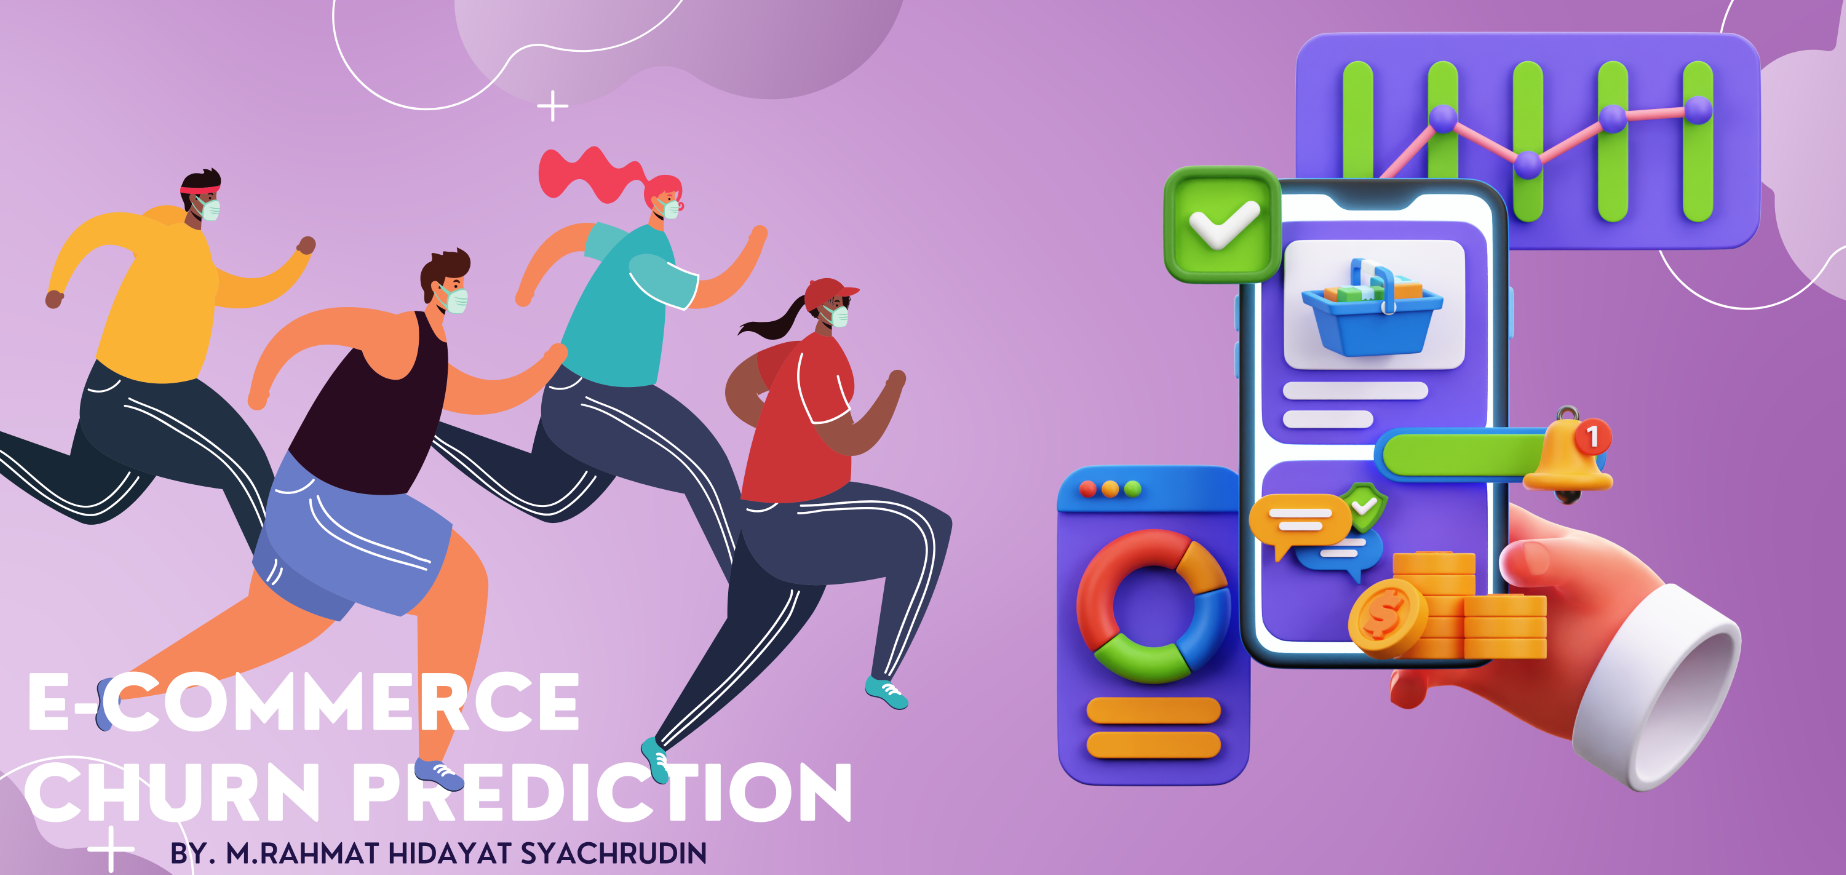

### **Business Problem Understanding**
---

### **Context**
Dalam era persaingan bisnis e-commerce yang semakin ketat, mempertahankan pelanggan menjadi elemen kunci untuk menjaga keberlanjutan dan pertumbuhan perusahaan. Customer churn, atau hilangnya pelanggan yang beralih ke layanan atau produk lain, menjadi ancaman signifikan yang dapat memengaruhi profitabilitas secara langsung. Saat pelanggan memilih untuk meninggalkan platform e-commerce dan beralih ke kompetitor, perusahaan tidak hanya kehilangan pendapatan, tetapi juga dihadapkan pada biaya besar untuk mendapatkan pelanggan baru—biaya ini bisa mencapai lima kali lipat dari upaya mempertahankan pelanggan yang sudah ada. Oleh karena itu, upaya retensi pelanggan harus menjadi fokus utama dalam strategi bisnis. Dengan semakin banyaknya pilihan platform e-commerce, inovasi, personalisasi layanan, dan penawaran promosi yang menarik menjadi krusial untuk menjaga loyalitas pelanggan. Melalui analisis data churn, perusahaan dapat mengidentifikasi pola perilaku pelanggan yang cenderung beralih dan merumuskan langkah-langkah preventif, seperti pengembangan program loyalitas, peningkatan kualitas layanan, atau personalisasi pengalaman berbelanja. Strategi retensi yang berbasis data ini tidak hanya membantu mengurangi churn, tetapi juga meningkatkan kepuasan dan loyalitas pelanggan, yang pada akhirnya akan mendukung keberhasilan jangka panjang perusahaan di pasar e-commerce yang dinamis.

### **Problem Statement**
Masalah churn pelanggan adalah tantangan signifikan bagi bisnis e-commerce, di mana hilangnya pelanggan secara terus-menerus dapat mengancam pendapatan jangka panjang. Untuk menjaga stabilitas bisnis, perusahaan perlu mampu memprediksi pelanggan yang berisiko churn sehingga dapat mengambil langkah proaktif, seperti menawarkan promosi atau insentif yang tepat sasaran. Namun, memberikan promosi kepada pelanggan yang sebenarnya tidak akan churn bisa menyebabkan kerugian operasional, karena sumber daya digunakan secara tidak efektif. Di tengah persaingan yang ketat, biaya akuisisi pelanggan baru semakin tinggi, sehingga mempertahankan pelanggan yang ada menjadi lebih krusial. Jika gagal, perusahaan tidak hanya kehilangan pendapatan, tetapi juga berisiko mengalami penurunan reputasi, terutama jika pelanggan yang churn menyampaikan ulasan negatif. Oleh karena itu, strategi retensi yang efektif dan berbasis data sangat diperlukan untuk mengarahkan promosi kepada pelanggan yang benar-benar berisiko, memastikan efisiensi biaya, menjaga loyalitas pelanggan, dan mendukung pertumbuhan bisnis secara berkelanjutan.

### **Goals**
Tujuan analisis ini adalah mengembangkan model prediksi machine learning untuk secara akurat mengidentifikasi pelanggan yang berpotensi churn, sehingga perusahaan e-commerce dapat mengoptimalkan strategi promosi dengan lebih efisien. Dengan fokus pada pelanggan yang memiliki probabilitas tinggi untuk churn, perusahaan dapat mengurangi kerugian pendapatan yang tidak perlu dan memaksimalkan efektivitas biaya pemasaran. Selain itu, analisis ini membantu perusahaan memahami faktor-faktor yang memengaruhi churn, memungkinkan mereka untuk menyusun strategi retensi yang lebih personal dan efektif. Hasil akhirnya adalah peningkatan loyalitas pelanggan, penurunan tingkat churn, serta peningkatan profitabilitas dan daya saing di pasar e-commerce yang kompetitif.

### **Analytic approach**
Pertama, kami akan menganalisis data pelanggan untuk mengidentifikasi pola yang memisahkan pelanggan yang cenderung churn dari mereka yang tidak. Selanjutnya, kami akan mengembangkan model klasifikasi yang dapat memperkirakan kemungkinan pelanggan akan churn, sehingga perusahaan dapat menerapkan strategi retensi yang lebih tepat sasaran untuk mengurangi tingkat churn dan mempertahankan basis pelanggan mereka.

### **Metric Evaluation**
- True Positive (TP) : pelanggan churn dengan benar dari total pelanggan yang churn
- True Negative (TN) : pelanggan non-churn berhasil diklasifikasikan dengan benar
- False Positive (FP): pelanggan non-churn yang salah diklasifikasikan sebagai churn
- False Negative (FN): pelanggan churn yang salah diklasifikasikan sebagai non-churn

Jika kita memfokuskan pada empat parameter berikut, maka evaluasi metrik yang digunakan adalah:
1. Accuracy: Digunakan untuk menilai sejauh mana model dapat secara akurat memprediksi pelanggan yang akan churn dibandingkan dengan keseluruhan prediksi yang dibuat oleh model.
2. Precision: Digunakan untuk mengukur tingkat ketepatan model dalam memprediksi pelanggan yang akan churn, bertujuan untuk menghindari kesalahan prediksi yang dapat mengakibatkan penggunaan anggaran promosi yang tidak efektif.
3. Recall: Digunakan untuk mengevaluasi kemampuan model dalam memprediksi pelanggan yang akan churn dibandingkan dengan semua pelanggan yang sebenarnya churn. Metrik ini penting untuk menilai seberapa baik model kita dalam mengidentifikasi seluruh pelanggan yang akan churn.
4. F1-Score: Merupakan kombinasi dari precision dan recall, yang memberikan gambaran menyeluruh tentang performa model dalam prediksi churn.

> Namun, di antara keempat metrik tersebut, karena prioritas perusahaan adalah memastikan anggaran promosi tepat sasaran untuk pelanggan yang benar-benar churn, fokus utama kita akan berada pada Recall. Hal ini disebabkan karena recall mampu menunjukkan sejauh mana model mampu mengidentifikasi semua pelanggan yang akan churn.

---
---

In [62]:
# Data manipulation & visualization
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Statistical tools
from scipy.stats import normaltest, chi2_contingency

# Machine Learning: Model selection & preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer

# Machine Learning: Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (VotingClassifier, StackingClassifier, RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier)                              
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import (classification_report, precision_score, recall_score,make_scorer, accuracy_score, f1_score, confusion_matrix)

# Handling class imbalance
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE)
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# SHAP for model interpretability
import shap

# Deployment
import pickle

# Ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

## **1. Data Understanding & EDA**

Data Understanding & EDA (Exploratory Data Analysis) adalah proses untuk memahami data secara lebih dalam sebelum dilakukan modeling atau analisis statistik lebih lanjut. EDA bertujuan untuk mengidentifikasi pola, hubungan antar variabel, outliers, distribusi data, serta missing values melalui teknik visualisasi dan statistik deskriptif. EDA membantu menganalisis data tanpa asumsi sebelumnya, memberikan pemahaman awal mengenai bagaimana data terstruktur dan bagaimana karakteristik masing-masing variabel.

In [63]:
# import dataset
raw_data = pd.read_csv('data_ecommerce_customer_churn.csv')
raw_data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### **1.1 Info Kolom**

#### **1.1.1 Deskripsi Kolom**

| Kolom | Deskripsi |
| --- | --- |
| Tenure | Lama waktu pengguna telah berlangganan layanan |
| WarehouseToHome | Jarak antara gudang ke rumah pelanggan |
| NumberOfDeviceRegistered | Total device yang terdaftar pada satu akun pengguna |
| PreferedOrderCat | Kategori pesanan pilihan pelanggan dalam bulan lalu|
| SatisfactionScore | Skor yang menunjukkan tingkat kepuasan pelanggan terhadap layanan |
| MaritalStatus | Status pernikahan pelanggan |
| NumberOfAddress | Total alamat yang tercatat pada satu akun pengguna |
| Complaint | Setiap keluhan yang telah diajukan dalam bulan lalu |
| DaySinceLastOrder | jumlah hari yang telah berlalu sejak pesanan terakhir dilakukan oleh pelanggan |
| CashbackAmount | Rata-rata cashback dalam bulan lalu |
| Churn | Indikator apakah pengguna berhenti menggunakan layanan (1 untuk churn, 0 untuk tidak churn) |

In [64]:
# Menampilkan jumlah baris dan kolom yang ada di Dataset Sebelum Cleaning
a,b = raw_data.shape
print(f'Dalam Dataset ini terdiri dari {a} baris dan {b} kolom')

Dalam Dataset ini terdiri dari 3941 baris dan 11 kolom


#### **1.1.2 Deskriptif statistik**

In [65]:
# Menampilkan Deskriptif statistik
display(raw_data.describe(), raw_data.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


#### **1.1.3 Identifikasi Missing Value**

In [66]:
# Menampilkan Missing Value yang ada di DataSet Sebelum Cleaning
listItem = []
for col in raw_data.columns :
    listItem.append([col, raw_data[col].dtype, len(raw_data),
                    raw_data[col].isna().sum(), round((raw_data[col].isna().sum()/len(raw_data[col])) * 100,2),
                    raw_data[col].nunique(),(raw_data[col].unique())]);

dfDesc = pd.DataFrame(columns=['Features','DataType','Data Count','Missing value','Missing value %','Unique','UniqueSample'],
                     data=listItem)
dfDesc

,Features,DataType,Data Count,Missing value,Missing value %,Unique,UniqueSample
0,Tenure,float64,3941,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,3941,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,3941,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,3941,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,3941,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3941,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,3941,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,3941,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,3941,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,3941,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


>**Interpretasi :**

1. Data tersebut memiliki `3941` baris dan `11` kolom (10 fitur dan 1 target)
2. Terdapat Missing value di kolom `Tenure` sebanyak **194 data (4.92% )**
3. Terdapat Missing value di kolom `WarehouseToHome` sebanyak **169 data (4.29%)**
4. Terdapat Missing value di kolom `DaySinceLastOrder` sebanyak **213 data (5.40%)**

Karena nilai Missing value cukup kecil (dibawah 6%), maka akan di drop setiap baris yang mengandung Missing value.

**Visualisasi Missing Value dengan MatrixPlot**
> Matrix plot akan memberikan isian warna untuk setiap kolomnya. Apabila data ada missing values, maka plot ditampilkan dalam warna putih.

Text(0.5, 1.0, 'Matrix Plot Missing Values Distribution in Dataset')

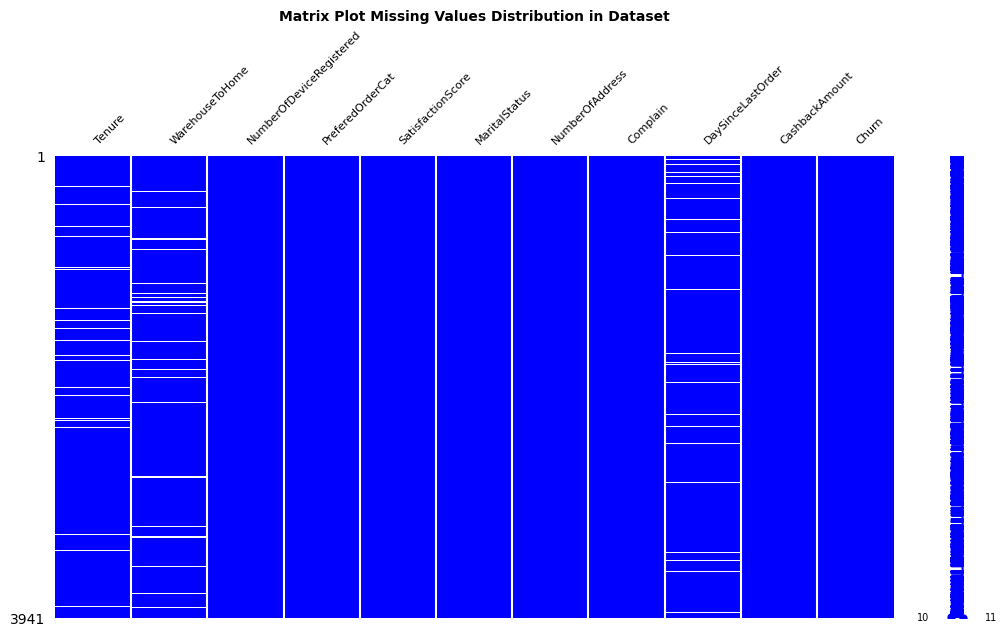

In [67]:
msno.matrix(raw_data, figsize=(12,6), fontsize=8, color=(0, 0, 1)).set_title('Matrix Plot Missing Values Distribution in Dataset', size=10, weight='bold')

> **Insight :** Jika dilihat pada matrix plot diatas, terlihat bahwa pada variabel dengan missing values memiliki pola yang acak (tidak menunjukkan pola yang sama antar fitur). 
`Tenure`, `WarehouseToHome` dan `DaySinceLastOrder` terlihat memiliki jumlah missing values yang signifikan. Ini ditandai oleh adanya garis-garis putih yang muncul pada matrix plot di bagian kolom tersebut.

**Korelasi antar variable dengan Visualiasi HeatMap**
> Penjelasan singkat dari apa yang dimaksud dengan **Nullity Correlation** dalam heatmap:

**Nullity correlation** mengukur bagaimana kehadiran atau ketidakhadiran satu variabel memengaruhi variabel lain dalam dataset, berdasarkan missing values.

Nilai korelasi:

- -1: Jika satu variabel muncul, maka variabel lain pasti tidak muncul (missing). Artinya, missing values antara dua variabel tersebut berlawanan.
- 0: Kehadiran atau ketidakhadiran satu variabel tidak memengaruhi variabel lainnya. Tidak ada hubungan antara missing values.
- 1: Jika satu variabel muncul, maka variabel lain pasti juga muncul (tidak missing). Artinya, missing values dari dua variabel tersebut selalu bersama-sama.

Text(0.5, 1.0, 'Correlation Between Variables with Missing Values')

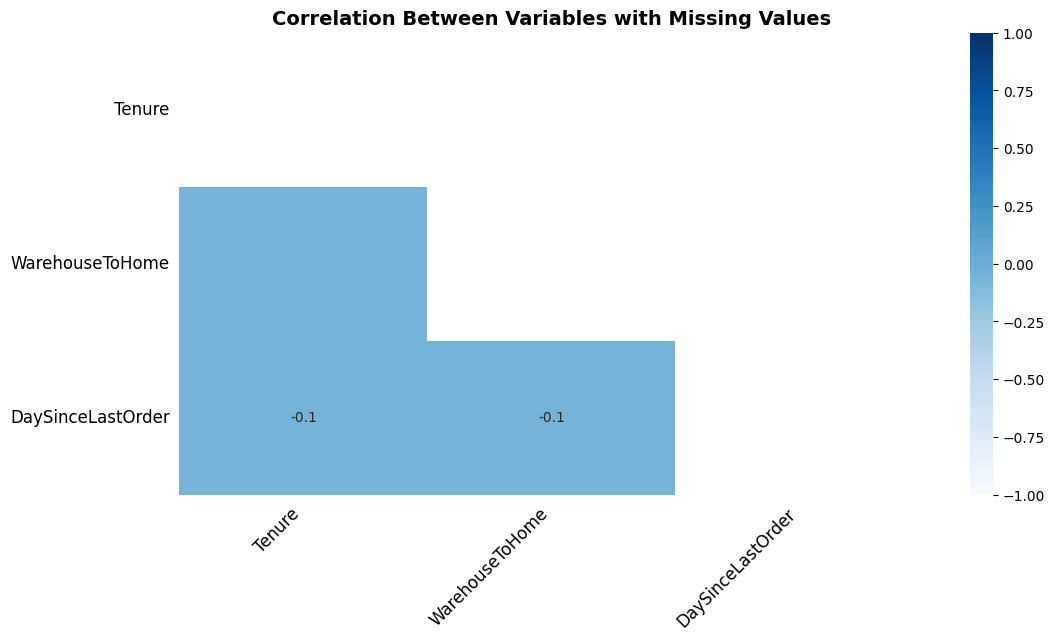

In [68]:
msno.heatmap(raw_data, cmap="Blues", figsize=(12,6), fontsize=12).set_title('Correlation Between Variables with Missing Values', size=14, weight='bold')

> **Insight :** Pada heatmap diatas menunjukkan bahwa semua variabel yang memiliki missing values memiliki hubungan korelasi negatif yang sangat lemah (-0.1) atau tidak ada hubungan antara missing value dalam satu kolom dibandingkan dengan yang lain. Artinya apabila terdapat missing value pada satu variabel, maka tidak ditemukannya missing value pada variabel lainnya.

#### **1.1.4 Identifikasi Tipe Variabel**

`Kategorikal`

In [69]:
# Mengidentifikasi variabel kategorikal
cat_vars = [var for var in raw_data.columns if raw_data[var].dtype == 'O'] 
raw_data_cat_vars = pd.DataFrame(cat_vars, columns=['Categorical Features']) # Membuat DataFrame 
raw_data_cat_vars

,Categorical Features
0,PreferedOrderCat
1,MaritalStatus


In [70]:
# Menampilkan unique value dari masing-masing variabel
cat_vars = [var for var in raw_data.columns if raw_data[var].dtype == 'O'] 

for cat in cat_vars:
    print(f'Unique value dari {cat} = {raw_data[cat].unique()}')

Unique value dari PreferedOrderCat = ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
Unique value dari MaritalStatus = ['Single' 'Married' 'Divorced']


`Numerikal`

In [71]:
# Mengidentifikasi variabel numerikal
num_vars = [var for var in raw_data.columns if raw_data[var].dtype != 'O' and var != 'Churn']

# Memisahkan variabel menjadi continuous dan discrete
cont_vars = [var for var in num_vars if raw_data[var].nunique() > 14]
dis_vars = [var for var in num_vars if raw_data[var].nunique() <= 14]

# Membuat DataFrame 
raw_data_num_vars = pd.DataFrame({
    'Type': ['Continuous' if var in cont_vars else 'Discrete' for var in num_vars]
},index=num_vars)
raw_data_num_vars

,Type
Tenure,Continuous
WarehouseToHome,Continuous
NumberOfDeviceRegistered,Discrete
SatisfactionScore,Discrete
NumberOfAddress,Discrete
Complain,Discrete
DaySinceLastOrder,Continuous
CashbackAmount,Continuous


#### **1.1.5 Uji Normalitas**

In [72]:
# Uji Normalitas
col=[var for var in raw_data.columns if raw_data[var].dtype != 'O' and var != 'Churn']
distribusi=[]
for i in col:
    stats, pval=normaltest(raw_data[i])
    if pval>0.05:
        distribusi.append('Terdistribusi Normal')
    else:
        distribusi.append('Tidak Terdistribusi Normal')
        
pd.DataFrame({'Distribusi Data':distribusi},index=col)

,Distribusi Data
Tenure,Tidak Terdistribusi Normal
WarehouseToHome,Tidak Terdistribusi Normal
NumberOfDeviceRegistered,Tidak Terdistribusi Normal
SatisfactionScore,Tidak Terdistribusi Normal
NumberOfAddress,Tidak Terdistribusi Normal
Complain,Tidak Terdistribusi Normal
DaySinceLastOrder,Tidak Terdistribusi Normal
CashbackAmount,Tidak Terdistribusi Normal


> **Insight :** Kolom numerikal dalam dataset ini distribusi datanya semua tidak terdistribusi dengan normal.

### **1.2 Data Cleaning**

#### **1.2.1 Handling Missing Values**

Pengecekan missing value dalam sebuah dataset adalah langkah penting yang bertujuan untuk memastikan kualitas dan integritas data sebelum melanjutkan ke tahap analisis lebih lanjut. Missing value dapat mengganggu hasil analisis, menyebabkan bias, atau bahkan membuat analisis yang dibuat menjadi tidak akurat jika tidak ditangani dengan benar. Dengan mengidentifikasi missing value, kita bisa memutuskan langkah terbaik untuk menangani data yang hilang, apakah itu dengan mengisi, menghapus, atau melakukan teknik imputasi lainnya. Hal ini penting untuk memastikan bahwa kesimpulan yang diambil dari data tersebut dapat diandalkan, sehingga menghasilkan keputusan yang lebih tepat dan analisis yang lebih efektif.

In [73]:
# Menghapus Missing value
raw_data.dropna(inplace=True)

> Tujuan dari `dropna()` adalah untuk menghapus baris atau kolom yang memiliki nilai missing (NaN atau nilai kosong) dalam sebuah DataFrame.

In [74]:
# Menampilkan Missing Value yang ada di DataSet Setelah Cleaning
listItem = []
for col in raw_data.columns :
    listItem.append([col, raw_data[col].dtype, len(raw_data),
                    raw_data[col].isna().sum(), round((raw_data[col].isna().sum()/len(raw_data[col])) * 100,2),
                    raw_data[col].nunique(),(raw_data[col].unique())]);

dfDesc = pd.DataFrame(columns=['Features','DataType','Data Count','Missing value','Missing value %','Unique','UniqueSample'],
                     data=listItem)
dfDesc

,Features,DataType,Data Count,Missing value,Missing value %,Unique,UniqueSample
0,Tenure,float64,3365,0,0.0,36,"[15.0, 7.0, 27.0, 30.0, 1.0, 11.0, 17.0, 16.0,..."
1,WarehouseToHome,float64,3365,0,0.0,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,3365,0,0.0,6,"[4, 3, 6, 2, 1, 5]"
3,PreferedOrderCat,object,3365,0,0.0,6,"[Laptop & Accessory, Mobile, Others, Mobile Ph..."
4,SatisfactionScore,int64,3365,0,0.0,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3365,0,0.0,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,3365,0,0.0,13,"[2, 5, 8, 3, 7, 9, 10, 1, 11, 4, 6, 22, 21]"
7,Complain,int64,3365,0,0.0,2,"[0, 1]"
8,DaySinceLastOrder,float64,3365,0,0.0,22,"[7.0, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0,..."
9,CashbackAmount,float64,3365,0,0.0,2002,"[143.32, 129.29, 168.54, 322.17, 152.81, 149.5..."


#### **1.2.2 Handling Duplicated**

Memeriksa duplikasi dalam sebuah dataset adalah langkah krusial dalam proses data cleansing. Duplikasi dapat menyebabkan bias. Dengan mengidentifikasi dan menghapus data yang berulang, kita dapat memastikan bahwa dataset yang digunakan mencerminkan representasi yang sebenarnya dari populasi yang dipelajari. Ini tidak hanya meningkatkan efisiensi pemrosesan data, tetapi juga memastikan bahwa setiap analisis yang dibuat berdasarkan data tersebut dapat diandalkan dan valid.

In [75]:
raw_data.duplicated().sum()

571

> Selanjutnya **menghapus baris-baris yang berisi data yang sama** atau duplikat dalam sebuah DataFrame. Secara khusus, **ini berguna ketika dataset memiliki data yang berulang, maka akan dapat mempengaruhi hasil analisis atau model prediktif.**

In [76]:
raw_data.drop_duplicates(keep='first',inplace=True)
raw_data=raw_data.reset_index().drop(columns = {'index'})

> Dengan `drop_duplicates()` membantu memastikan bahwa setiap baris dalam dataset unik (tidak ada yang duplikasi) dan merepresentasikan informasi yang berbeda tanpa adanya pengulangan yang tidak diinginkan.

In [77]:
raw_data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1170
Mobile Phone           698
Fashion                346
Grocery                229
Mobile                 202
Others                 149
Name: count, dtype: int64

In [78]:
raw_data['PreferedOrderCat'] = raw_data['PreferedOrderCat'].replace('Mobile','Mobile Phone')
raw_data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1170
Mobile Phone           900
Fashion                346
Grocery                229
Others                 149
Name: count, dtype: int64

#### **1.2.3 Handling Outliers**

Mencari dan memahami outliers adalah langkah penting dalam analisis data karena mereka dapat memberikan wawasan mendalam tentang data yang sedang dianalisis, serta membantu menghindari kesalahan dalam interpretasi statistik. Outliers bisa menunjukkan kesalahan yang perlu diperbaiki, anomali yang perlu diperhatikan, atau bahkan peluang baru yang perlu dieksplorasi.

In [79]:
def calculate_outliers(raw_data, column):
    Q1 = raw_data[column].quantile(0.25)
    Q3 = raw_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = raw_data[(raw_data[column] < lower_bound) | (raw_data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_raw_data = []

numerical = [var for var in raw_data.columns if raw_data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(raw_data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(raw_data[column]) * 100, 2)
    outlier_raw_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_raw_data = pd.DataFrame(outlier_raw_data, columns=["Column", "Total Outliers", "Percentage Outliers(%)", "Lower Bound", "Upper Bound"])
outlier_raw_data

,Column,Total Outliers,Percentage Outliers(%),Lower Bound,Upper Bound
0,Tenure,4,0.14,-16.500,35.500
1,WarehouseToHome,1,0.04,-9.000,39.000
2,NumberOfDeviceRegistered,194,6.94,1.500,5.500
3,SatisfactionScore,0,0.00,-1.000,7.000
4,NumberOfAddress,2,0.07,-4.000,12.000
5,Complain,0,0.00,-1.500,2.500
6,DaySinceLastOrder,9,0.32,-7.000,17.000
7,CashbackAmount,340,12.17,81.825,259.585
8,Churn,411,14.71,0.000,0.000


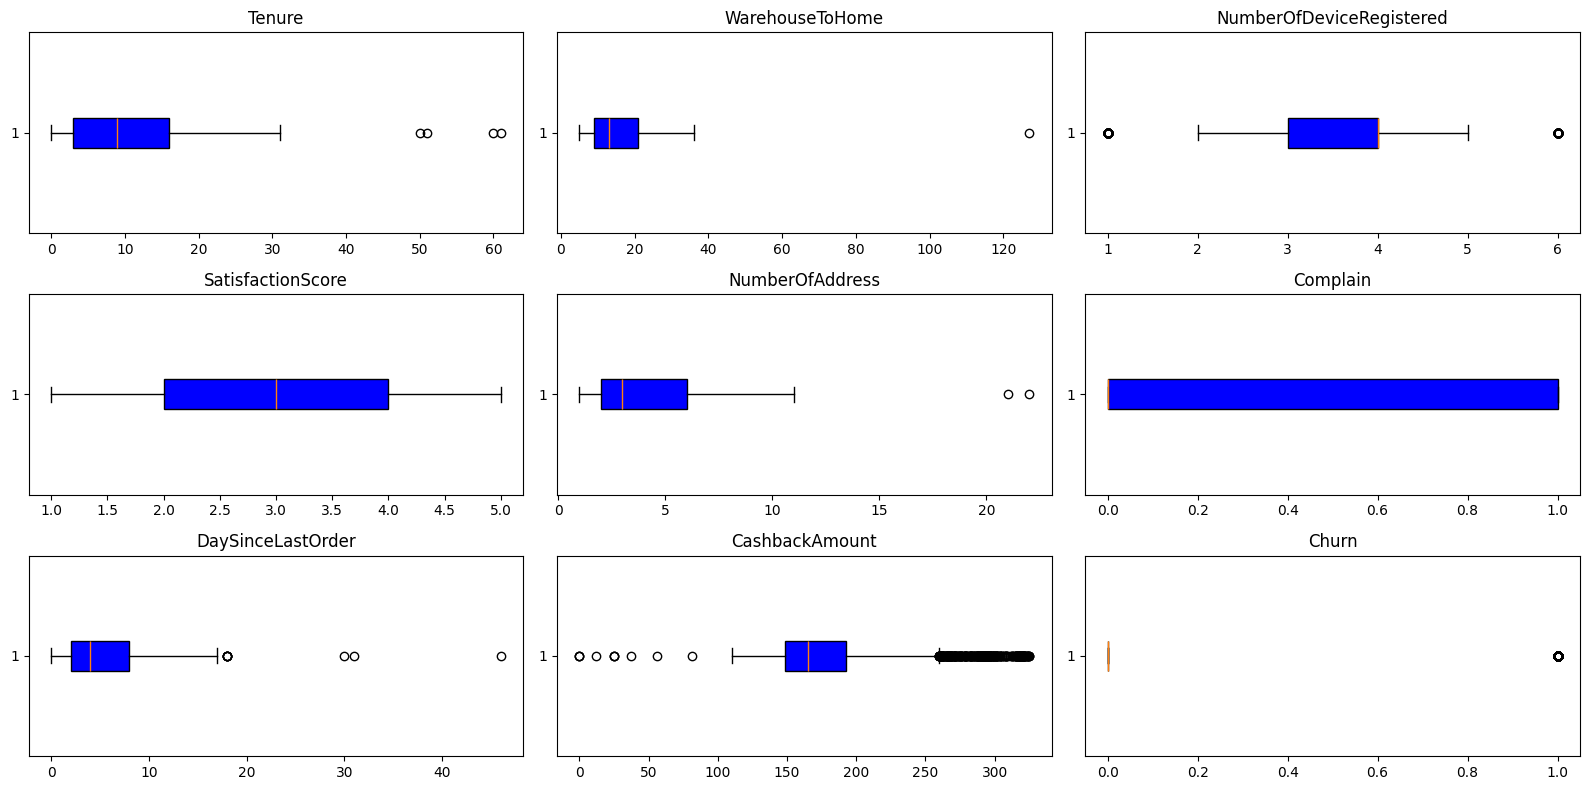

In [80]:
number_col = raw_data.select_dtypes(include=['float64', 'int64']).columns
num_col = len(number_col)
num_row = (num_col // 3) + (num_col % 3 > 0)

plt.figure(figsize=(16, 8))

for i, column in enumerate(number_col, 1):
    plt.subplot(num_row, 3, i)
    plt.boxplot(raw_data[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor="blue"))
    plt.title(column)

plt.tight_layout()
plt.show()


> **Insight :** 

1. `Tenure:`
grafik Tenure menampilkan adanya outlier yang diatas lebih dari 50 bulan, ini menunjukkan ada beberapa pelanggan yang masih berlangganan dengan priode yang lama. mayoritas pelanggan berlangganan layanan di kurun waktu yang kurang dari 20 bulan. Median dari masa berlangganan pelanggan berada di bawah 10 bulan, yang menegaskan bahwa banyak pelanggan yang cenderung berlangganan dalam waktu singkat.

2. `WarehouseToHome:`
grafik WarehouseToHome mengambarkan Jarak antara gudang ke rumah pelanggan, ada satu outlier yang memiliki jarak lebih dari 120 km. Mayoritas jarak berada di bawah 21 km. 

3. `NumberOfDeviceRegistered:`
Terdapat dua outliers di sekitar nilai 1 dan 6, yang menunjukkan bahwa sebagian besar pelanggan mendaftarkan 2 hingga 5 perangkat, tetapi ada beberapa yang mendaftarkan lebih sedikit atau lebih banyak dari itu.

4. `SatisfactionScore:`
Tidak ada outliers yang signifikan pada variabel ini. Nilai SatisfactionScore terdistribusi dengan baik di antara rentang skor 1 hingga 5, menunjukkan bahwa skor kepuasan pelanggan cenderung lebih teratur.

5. `NumberOfAddress:`
Ada beberapa outliers di atas nilai 10, yang menunjukkan bahwa ada pelanggan dengan banyak alamat yang terdaftar, tetapi sebagian besar pelanggan memiliki di bawah 10 alamat.

6. `Complain:`
Variabel ini merupakan variabel biner (0 atau 1) sehingga tidak memiliki outliers. Data menunjukkan apakah pelanggan mengajukan keluhan (1) atau tidak (0).

7. `DaySinceLastOrder:`
Terdapat outliers di atas 20 hari, yang menunjukkan bahwa ada pelanggan yang melakukan pemesanan terakhir mereka cukup lama. Ini bisa menandakan dan juga memungkinkan pelanggan sedang dalam perjalanan untuk churn.

8. `CashbackAmount:`
Ada banyak outliers, terutama di atas nilai 250. Ini menunjukkan bahwa sebagian besar pelanggan mendapatkan cashback dalam jumlah yang lebih rendah, tetapi ada beberapa yang mendapatkan cashback yang sangat tinggi.

9. `Churn:`
Variabel ini merupakan variabel biner (0 atau 1) sehingga outliers tidak relevan. Nilai ini menunjukkan apakah pelanggan churn (1) atau tidak (0).

> **Mempertahankan Outliers:**

> Berdasarkan analisis outliers melalui visualisasi boxplot, data tersebut bukan merupakan hasil dari kesalahan input atau sistem, melainkan mencerminkan realitas yang ada dalam dataset. Oleh karena itu, dalam pembuatan model klasifikasi kali ini, outliers tetap akan dipertahankan. Untuk meningkatkan performa model, outliers tersebut nantinya akan dioptimalkan melalui teknik preprocessing, untuk memastikan bahwa model mampu menangani variasi data dengan lebih baik.

1. `Informasi Penting :` Dalam beberapa kasus, outliers justru membawa informasi yang sangat penting. Misalnya, pelanggan yang menerima `CashbackAmount` besar atau yang jarang melakukan pemesanan memungkinkan untuk menunjukkan pola yang sangat penting untuk prediksi churn. Menghapus outliers bisa menghilangkan informasi berharga yang memungkinkan relevan dalam konteks churn.

2. `Menghindari Kehilangan Data:` Menghapus outliers bisa menyebabkan hilangnya data yang memungkinkan masih valid dan berharga, terutama jika jumlah data yang tersisa tidak terlalu besar. Hal ini bisa membuat model memiliki bias karena belajar dari data yang lebih kecil dan tidak mencerminkan populasi asli.

3. `Overfitting pada Data Kecil:` Jika terlalu banyak data yang dihapus (terutama data yang dianggap outliers), model bisa kehilangan generalisasi dan menjadi overfitting pada data yang tersisa. Dengan mempertahankan outliers,memberi kesempatan pada model untuk belajar dari semua variasi yang memungkinkan ada di data.

### **1.3 Data Distribution**

#### **1.3.1 Target (Churn)**

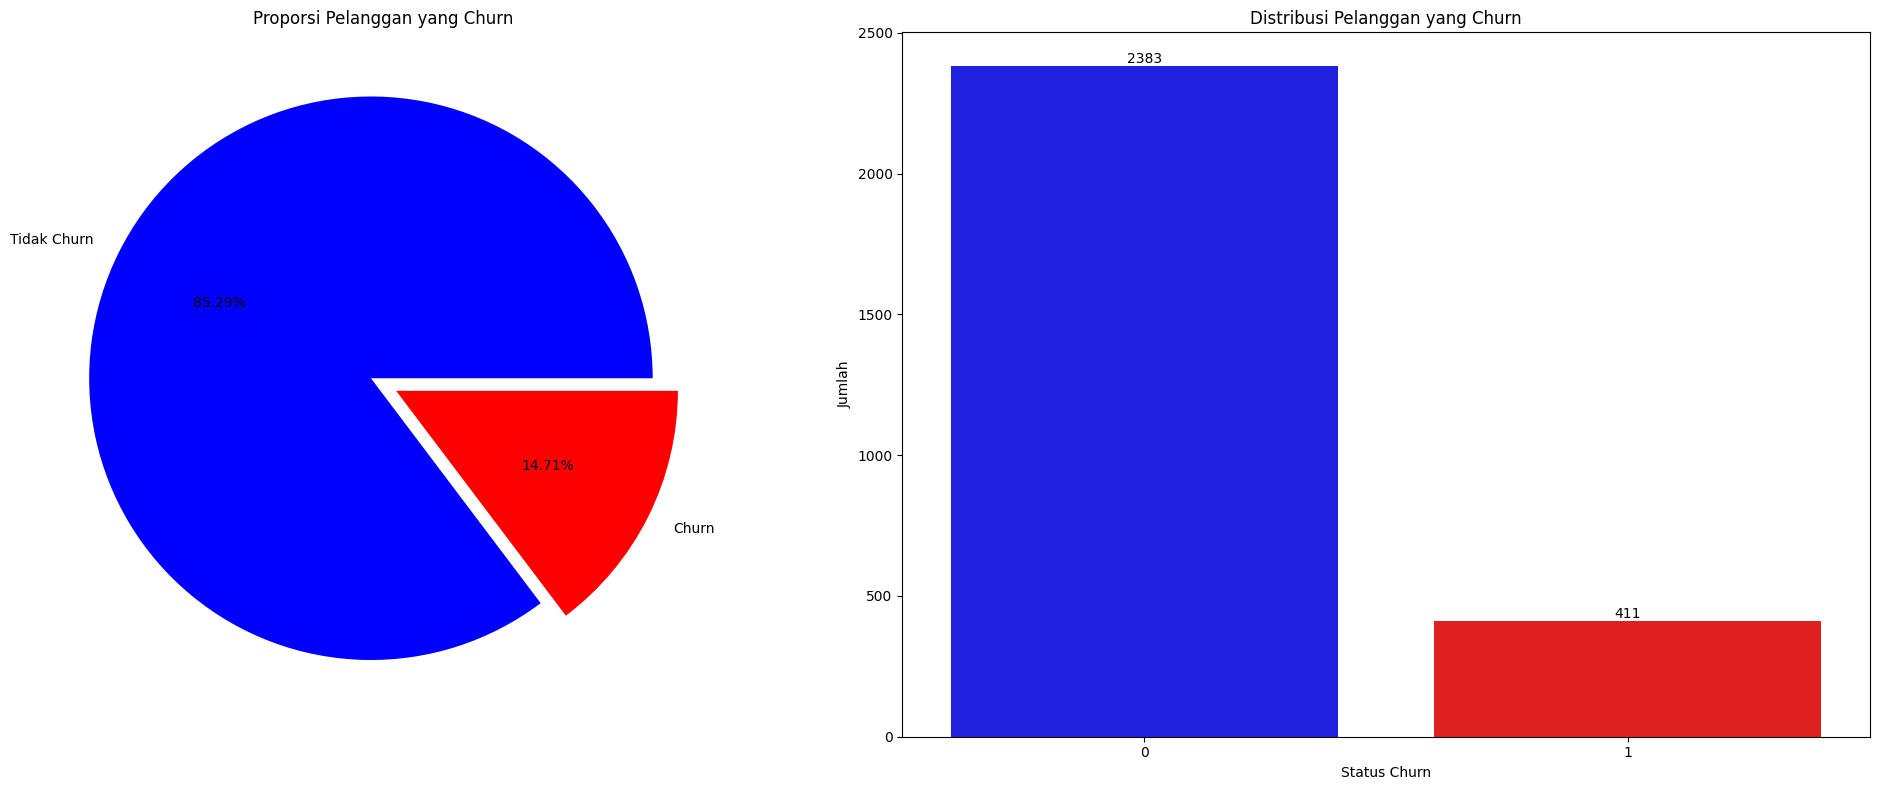

In [81]:
# Mengatur ukuran figure
plt.figure(figsize=(20, 8))

# Plot pie chart pada subplot pertama
plt.subplot(1, 2, 1)
plt.pie(
    raw_data['Churn'].value_counts(), 
    labels=['Tidak Churn', 'Churn'],  
    autopct='%1.2f%%',
    explode=(0.05, 0.05),  
    colors=['blue', 'red']  
)
plt.title('Proporsi Pelanggan yang Churn', fontsize=12)

# # Plot countplot pada subplot kedua
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Churn', data=raw_data, palette=['blue', 'red'])

# Menambahkan anotasi jumlah pelanggan di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan jumlah di atas bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Lokasi anotasi
                ha='center', va='center',  # Anotasi di tengah bar
                xytext=(0, 5),  # Offset posisi teks
                textcoords='offset points')
plt.title('Distribusi Pelanggan yang Churn', fontsize=12)
plt.xlabel('Status Churn')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


> **Insight :** Dari kedua visualisasi menunjukkan Mayoritas pelanggan tidak Churn (tetap berlangganan) dengan persentase 85.29 %, ini memerlukan strategi retensi yang lebih efektif lagi untuk tetap mempertahankan pelanggan dan meningkatkan keloyalan pelanggan. 

> Dari kedua visualisasi juga menggambarkan **Data Imbalance** yang dimana lebih di dominasi oleh pelanggan yang tidak churn, terdapat proporsi yang berbeda dimana Churn 411 pelanggan dengan persentase 14.71% sedangkan yang tidak Churn 2383 pelanggan dengan persentase 85,29 %. Dengan adanya Data Imbalance ini akan mempengaruhi ke model yang akan dibuat terutama pada saat memprediksi kelas dengan jumlah yang lebih sedikit atau kelas minoritas.

#### **1.3.2 Numerikal VS Target (Churn)**

In [82]:
num_vars = [var for var in raw_data.columns if raw_data[var].dtype != 'O' and var != 'Churn'] # Numerikal
cat_vars = [var for var in raw_data.columns if raw_data[var].dtype == 'O'] # Kategorikal

# Memisahkan variabel menjadi continuous dan discrete
cont_vars = [var for var in num_vars if raw_data[var].nunique() > 14]
dis_vars = [var for var in num_vars if raw_data[var].nunique() <= 14]

##### **1.3.2.1 Kolom Kontinu VS Target (Churn)**

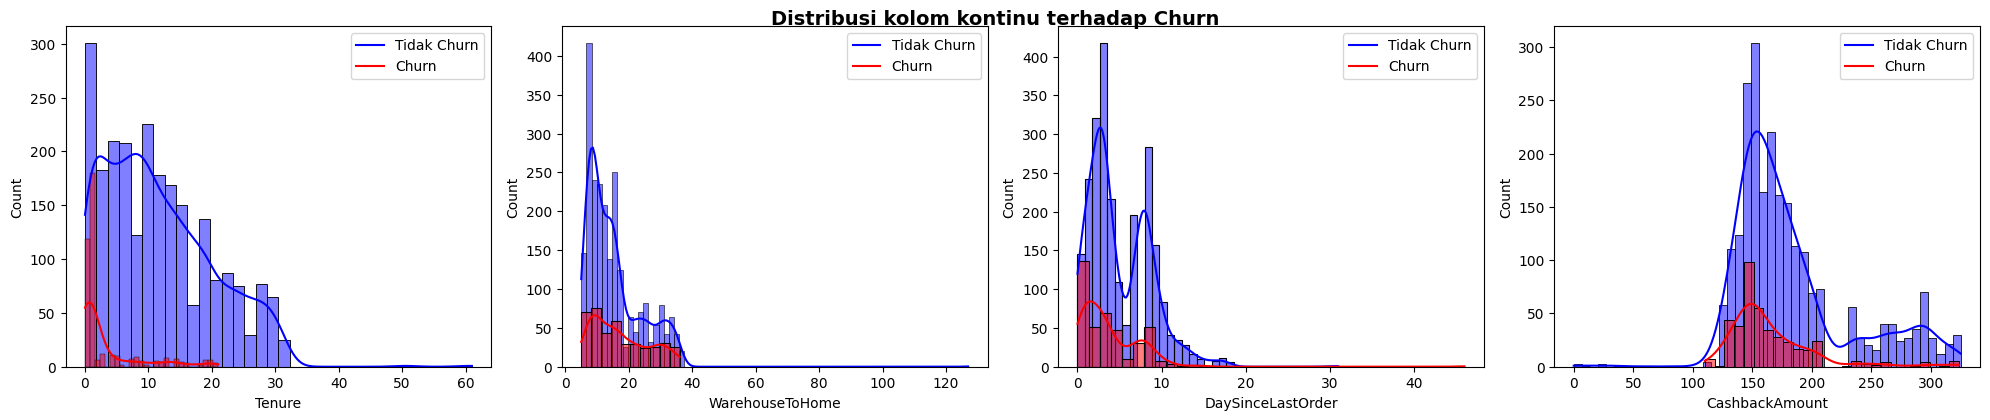

In [83]:
# Distribusi pada kolom kontinu terhadap churn
a=1
sns.color_palette('pastel')
plt.figure(figsize=(20,16))
for i in cont_vars:
    plt.subplot(4,4,a)
    sns.histplot(x=raw_data[raw_data['Churn']==0][i],kde=True,color='blue')
    sns.histplot(x=raw_data[raw_data['Churn']==1][i],kde=True,color='red')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1
    
plt.suptitle('Distribusi kolom kontinu terhadap Churn', size=14, weight='bold', ha='center')
plt.tight_layout()
plt.show()

> **Insight :**

1. `Tenure`: Pelanggan yang tidak churn (biru) cenderung memiliki masa berlangganan yang lebih panjang. Sebagian besar pelanggan yang churn (merah) berlangganan dalam rentang waktu yang lebih pendek, sekitar 0-10 bulan. Ini menunjukkan bahwa pelanggan dengan waktu berlangganan yang lebih lama cenderung lebih loyal dan tidak churn.

2. `WarehouseToHomeW`: Pelanggan yang tidak churn (biru) memiliki distribusi jarak pengiriman yang cenderung lebih pendek, dengan sebagian besar berada di bawah 20 satuan jarak. Sementara itu, pelanggan yang churn (merah) memiliki distribusi yang lebih merata di jarak pengiriman yang lebih panjang. Ini bisa menunjukkan bahwa jarak pengiriman yang lebih jauh memungkinkan memengaruhi keputusan pelanggan untuk churn.

3. `DaySinceLastOrder`: Pelanggan yang churn (merah) cenderung memiliki hari sejak pemesanan terakhir yang lebih lama dibandingkan pelanggan yang tidak churn. Pelanggan yang tidak churn (biru) cenderung melakukan pemesanan secara lebih teratur (hari terakhir lebih dekat dengan 0). Ini menunjukkan bahwa semakin lama pelanggan tidak melakukan pemesanan, semakin besar kemungkinan mereka untuk churn.

4. `CashbackAmount`: Pelanggan yang tidak churn (biru) cenderung menerima jumlah cashback yang lebih tinggi, dengan puncak di sekitar 150 hingga 200. Sementara itu, pelanggan yang churn (merah) lebih sering menerima cashback yang lebih rendah. Ini bisa menunjukkan bahwa insentif dalam bentuk cashback yang lebih besar dapat meningkatkan loyalitas pelanggan dan mengurangi kemungkinan churn.

Secara keseluruhan, grafik diatas memberikan kita informasi tentang perilaku pelanggan yang dimana `Tenure` dan `DaySinceLastOrder` sangat memengaruhi churn, di mana pelanggan yang baru saja bergabung atau sudah lama tidak melakukan transaksi cenderung lebih memungkinkan churn. `WarehouseToHome` juga tampaknya memengaruhi churn, di mana jarak yang lebih jauh berkorelasi dengan lebih tingginya churn. `CashbackAmount` menunjukkan bahwa pelanggan yang mendapatkan lebih banyak cashback lebih cenderung tidak churn. Ini menunjukkan bahwa pemberian cashback merupakan strategi yang efektif untuk mempertahankan pelanggan.

##### **1.3.2.2 Kolom Diskrit VS Target (Churn)**

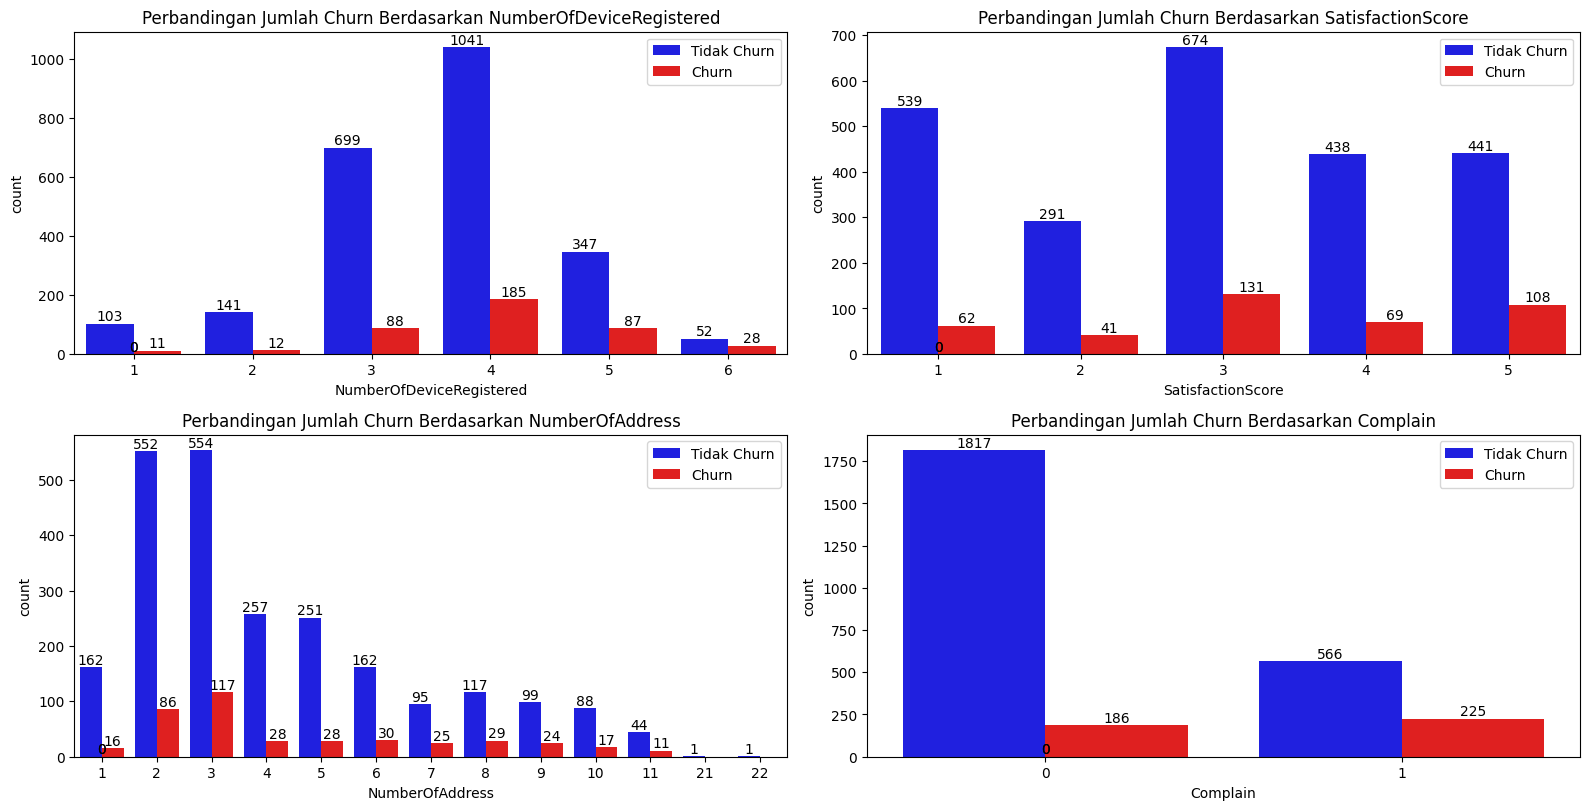

In [84]:
# Visualisasi Barplot
ount_col = []
plt.figure(figsize=(16,40))
plot_num = 1

for col in dis_vars:
    if raw_data[col].nunique() <= 14 and col != "Churn":
        plt.subplot(10, 2, plot_num)
        ax = sns.countplot(data=raw_data, x=col, hue="Churn", palette=['blue', 'red'])
        
        # Menambahkan anotasi jumlah di atas setiap bar
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}',  
                        (p.get_x() + p.get_width() / 2, height),  
                        ha='center', va='bottom',  
                        xytext=(0, 0),  
                        textcoords='offset points')
        
        plt.legend(labels=['Tidak Churn', 'Churn'])
        plot_num += 1
    plt.title(f'Perbandingan Jumlah Churn Berdasarkan {col}')

plt.tight_layout()
plt.show()

> **Insight :**
1. `NumberOfDeviceRegistered:`
- Pelanggan yang tidak churn (biru) cenderung memiliki 3 hingga 4 perangkat yang terdaftar, sementara pelanggan yang churn (merah) sebagian besar memiliki 2 hingga 4 perangkat terdaftar.
- Jumlah perangkat yang lebih sedikit (1-2) tampaknya lebih sering diasosiasikan dengan pelanggan yang churn, sementara semakin banyak perangkat yang terdaftar tampaknya lebih berkaitan dengan pelanggan yang tidak churn.
2. `SatisfactionScore:`
- Mayoritas pelanggan yang tidak churn memiliki skor kepuasan tinggi (3 hingga 5). Terutama, skor 3 memiliki distribusi terbesar untuk pelanggan yang tidak churn.
- Pelanggan yang churn cenderung memiliki skor kepuasan yang lebih rendah, khususnya dengan skor 1 dan 2. Ini menunjukkan hubungan langsung antara kepuasan yang rendah dan kemungkinan churn yang lebih tinggi.
3. `NumberOfAddress:`
- Mayoritas pelanggan yang tidak churn memiliki 1 hingga 3 alamat, dengan puncak pada 2 dan 3 alamat. Sementara itu, pelanggan yang churn cenderung lebih banyak berada pada jumlah alamat yang sedikit, terutama pada 2 alamat. Namun, seiring bertambahnya jumlah alamat di atas 3, proporsi pelanggan yang churn mulai meningkat. Pelanggan dengan lebih dari 4 alamat menunjukkan risiko churn yang lebih tinggi secara proporsional, meskipun jumlah mereka lebih sedikit secara keseluruhan. 
- Ini menunjukkan bahwa jumlah alamat yang lebih banyak berhubungan dengan mobilitas atau kebutuhan khusus yang memengaruhi keputusan pelanggan untuk berhenti berlangganan.
4. `Complain:`
- Sebagian besar pelanggan tidak mengajukan keluhan (kode 0) dan tidak churn. Namun, di antara pelanggan yang mengajukan keluhan (kode 1), terdapat jumlah pelanggan churn yang lebih tinggi.
- Ini mengindikasikan bahwa pelanggan yang mengajukan keluhan lebih memungkinkan churn dibandingkan mereka yang tidak.

> `NumberOfDeviceRegistered` dan `SatisfactionScore` adalah indikator penting dari churn. Semakin banyak perangkat yang terdaftar dan semakin tinggi skor kepuasan, semakin kecil kemungkinan pelanggan untuk churn.
`Complain` tampaknya menjadi indikator churn yang kuat. Pelanggan yang mengeluh lebih memungkinkan churn dibandingkan mereka yang tidak mengajukan keluhan.

> Insight ini dapat membantu dalam mengembangkan strategi retensi pelanggan, seperti meningkatkan kepuasan pelanggan, memberikan insentif untuk pelanggan yang sudah lama berlangganan, atau menindaklanjuti keluhan pelanggan dengan lebih cepat.

#### **1.3.3 Kategorikal VS Target (Churn)**

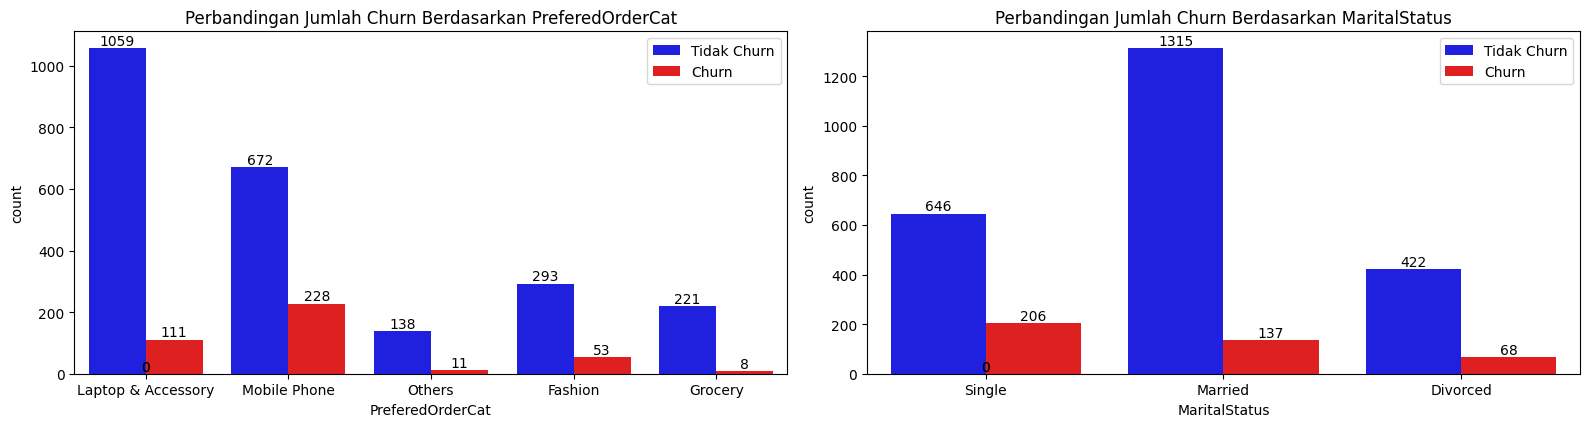

In [85]:
# Visualisasi Barplot
ount_col = []
plt.figure(figsize=(16,40))
plot_num = 1

for col in cat_vars:
    if raw_data[col].nunique() <= 14 and col != "Churn":
        plt.subplot(10, 2, plot_num)
        ax = sns.countplot(data=raw_data, x=col, hue="Churn", palette=['blue', 'red'])
        
        # Menambahkan anotasi jumlah di atas setiap bar
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}',  
                        (p.get_x() + p.get_width() / 2, height),  
                        ha='center', va='bottom',  
                        xytext=(0, 0),  
                        textcoords='offset points')
        
        plt.legend(labels=['Tidak Churn', 'Churn'])
        plot_num += 1
    plt.title(f'Perbandingan Jumlah Churn Berdasarkan {col}')

plt.tight_layout()
plt.show()

> **Insight :**
1. `PreferedOrderCat:`
- Pelanggan yang tidak churn lebih sering membeli Laptop & Accessory dan Mobile Phone dibandingkan kategori lainnya.
- Pelanggan yang churn terlihat memiliki distribusi yang lebih merata di semua kategori, tetapi tetap ada preferensi yang lebih besar terhadap Mobile Phone. Kategori Fashion dan Grocery tampaknya memiliki persentase churn yang lebih tinggi dibandingkan kategori lainnya, meskipun total jumlah pesanan dalam kategori tersebut lebih rendah.

2. `MaritalStatus:`
- Pelanggan yang tidak churn sebagian besar berada pada kategori Married (menikah), menunjukkan bahwa pelanggan yang menikah lebih loyal dibandingkan kategori lain.
- Pelanggan dengan status Single dan Divorced (bercerai) cenderung lebih memungkinkan churn dibandingkan yang menikah.

> `PreferedOrderCat` seperti Mobile Phone dan Laptop & Accessory, lebih sering dipilih oleh pelanggan yang tidak churn, sementara kategori Grocery dan Fashion memiliki lebih banyak churn.
`MaritalStatus` juga memberikan pengaruh, dengan pelanggan yang menikah menunjukkan loyalitas yang lebih tinggi.

#### **1.3.4 Data Correlation**

##### **1.3.4.1 Numerical fitur vs Target**

> Numerical fitur vs Target
Untuk dapat memahami korelasi antara fitur numerikal dengan target, maka dilakukanlah uji korelasi antar fitur. Karena semua fitur numerikal tidak terdistribusi normal, maka uji korelasi akan menggunakan `uji korelasi Spearman`. Rentang hasil uji korelasi adalah dari -1 sampai dengan 1.

Text(0.5, 1.0, 'Correlation Numerical Feature vs Churn (Target)')

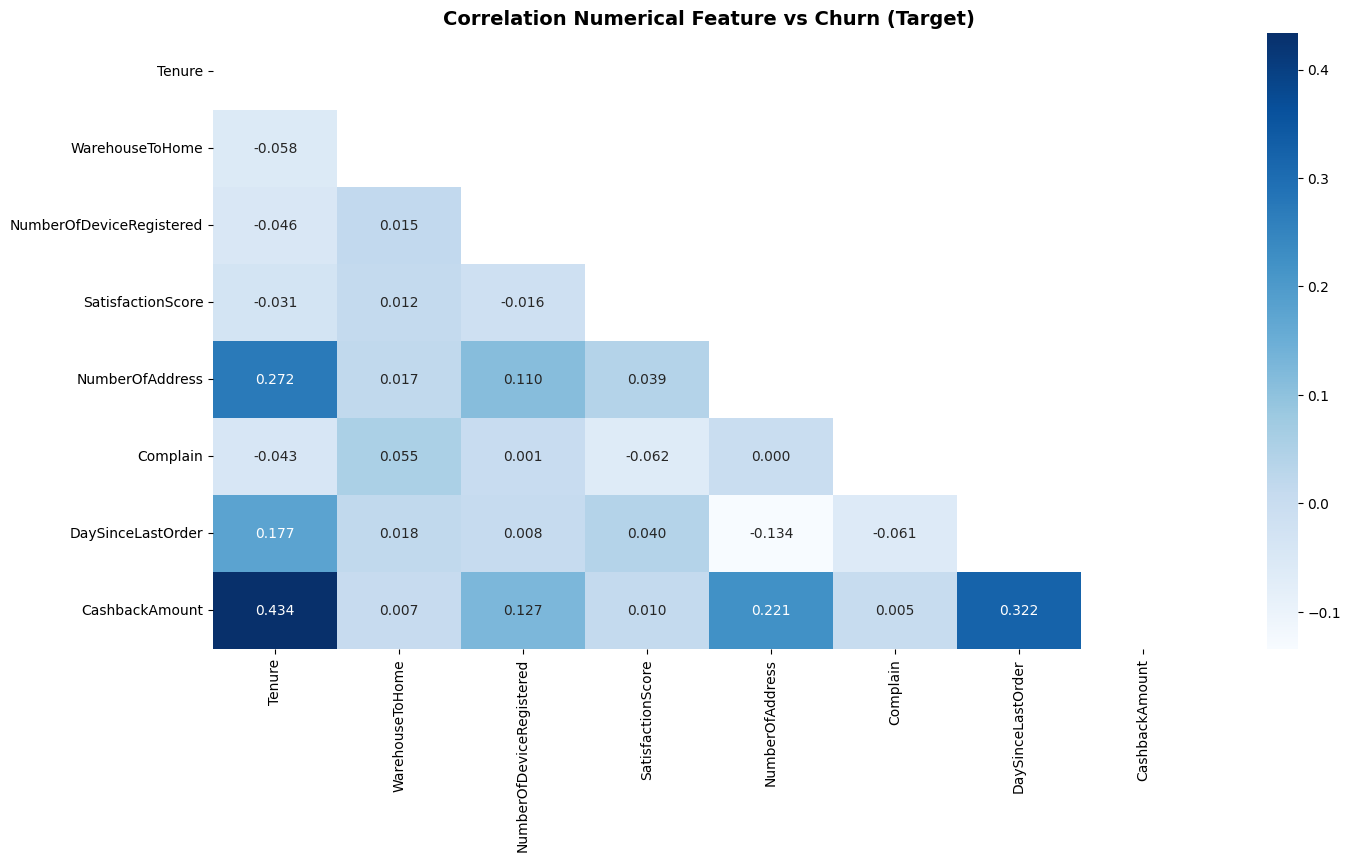

In [86]:
num_data = raw_data[num_vars]
corr = num_data.corr(method='spearman')

plt.figure(figsize=(16,8))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='Blues')
plt.title('Correlation Numerical Feature vs Churn (Target)', size=14, weight='bold')

>**insight :** 

- `CashbackAmount` menunjukkan korelasi positif yang cukup kuat terhadap churn dengan nilai korelasi 0.434. 

- `NumberOfAddress` memiliki korelasi positif moderat terhadap churn dengan nilai korelasi 0.272. 

- `DaySinceLastOrder` juga memiliki korelasi positif moderat sebesar 0.177 terhadap churn. 

- `Tenure` memiliki korelasi yang negatif lemah (-0.058) terhadap churn. Artinya, semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka churn, meskipun pengaruhnya relatif kecil.

- `PreferedOrderCat`, `WarehouseToHome`, `NumberOfDeviceRegistered` serta `Complain` memiliki korelasi yang sangat lemah dengan churn, dengan nilai yang mendekati nol. Ini menunjukkan bahwa fitur-fitur ini tidak signifikan dalam memprediksi churn.

##### **1.3.4.2 Categorical Feature vs Target**

> Untuk melihat menguji keterkaitan antara fitur Kategorikal dengan target, disini akan menggunakan uji chi-square. Adapun hipotesisnya sebagai berikut:
- H0: fitur categorical dan target `Churn` tidak saling terkait (independent) 
- HA: fitur categorical dan target `Churn` saling terkait (dependent)

In [87]:
# Melakukan uji chi square
chi2_result = []

for i in cat_vars:
  raw_data_chi = pd.crosstab(raw_data[i], raw_data['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(raw_data_chi)
  chi2_result.append(round(pvalue, 5))

raw_data_chi_result = pd.DataFrame({'categorical_features': cat_vars,'chi2_score': chi2_result})
raw_data_chi_result['notes'] = np.where(raw_data_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
raw_data_chi_result

,categorical_features,chi2_score,notes
0,PreferedOrderCat,0.0,dependent
1,MaritalStatus,0.0,dependent


> **Insight :** Berdasarkan hasil uji chi-square diatas, diketahui bahwa `PreferedOrderCat` dan `MaritalStatus` fitur kategorikal memiliki chi-square score < 0.05 (berhasil menolak H0). Artinya masing-masing fitur kategorikal saling terkait dengan target `Churn`.

**Simpan Data Setelah Cleaning**

In [88]:
# Saving Data-After-Cleaned
# raw_data.to_csv('E-Commerce_Churn_After_Cleaned.csv', index=False)

## **2. Membuat Model Machine Learning**

### **2.1 Data Preprocessing**

In [89]:
df=raw_data.copy()
df['Churn'].value_counts()

Churn
0    2383
1     411
Name: count, dtype: int64

#### **2.1.1 Label Encoding untuk Data Kategorikal**
> Penjelasan: Langkah ini bertujuan untuk mengubah variabel kategorikal menjadi numerik, karena model machine learning tidak bisa menerima data dalam bentuk string. Label Encoding digunakan agar nilai kategorikal dapat diubah ke bentuk integer tanpa menghilangkan informasi.

In [90]:
le = LabelEncoder()

# Membuat variabel baru untuk menyimpan hasil encoding
transforme = df.copy()

# Encode for categorical columns dan simpan ke transforme
for i in transforme.columns:
    if transforme[i].dtype == 'object':
        transforme[i] = le.fit_transform(transforme[i])

# Tampilkan hasil encoding
transforme.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,2,3,2,2,0,7.0,143.32,0
1,7.0,25.0,4,3,1,1,2,0,7.0,129.29,0
2,27.0,13.0,3,2,1,1,5,0,7.0,168.54,0
3,30.0,15.0,4,4,4,2,8,0,8.0,322.17,0
4,7.0,16.0,4,3,2,0,2,0,11.0,152.81,0


#### **2.1.2 Handling Imbalanced Data (SMOTETomek)**
> Penjelasan: Karena distribusi target Churn kemungkinan tidak seimbang, kita menggunakan SMOTETomek untuk melakukan oversampling pada kelas minoritas dan membersihkan data mayoritas yang berada di sekitar data minoritas. Ini meningkatkan performa model untuk memprediksi data yang imbang antara churn dan non-churn.

In [91]:
# Target variable adalah 'Churn'
X = transforme.drop('Churn', axis=1)
Y = transforme['Churn']

# Setelah semua data kategori diubah menjadi numerik, lakukan SMOTETomek
smt = SMOTETomek(random_state=42)
x_over, y_over = smt.fit_resample(X,Y)
x_over.shape, y_over.shape

((4752, 10), (4752,))

### **2.2 Data Splitting**
>Penjelasan: Split data menjadi data latih dan data uji, dengan 30% sebagai data uji untuk mengevaluasi performa model.

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=42)

### **2.3 Normalisasi Data**
> Penjelasan: Normalisasi dilakukan menggunakan `MinMaxScaler` agar semua fitur berada pada rentang yang sama, umumnya antara 0 dan 1. Ini sangat penting untuk model seperti Logistic Regression dan SVM.

In [93]:
MN = MinMaxScaler()

x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.transform(x_test)


### **2.4 Model Training**

#### **2.4.1 Evaluasi Model (Training dan Testing Accuracy)**
> Penjelasan: Kita akan menggunakan beberapa model populer seperti Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting, dan XGBoost untuk melatih dan mengevaluasi performa model. Kita juga membandingkan performa dengan dan tanpa SMOTETomek.

In [94]:
# Definisikan model-model yang digunakan
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=62)
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
rf = RandomForestClassifier(random_state=42, max_depth=3)
gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=42, max_depth=3)
xgb = XGBClassifier(learning_rate=0.1, random_state=42, max_depth=3)

In [95]:
# Menggunakan StratifiedKFold untuk cross-validation
skfold = StratifiedKFold(n_splits=5)
models = [logreg, knn, tree, rf, gbc, xgb]

# Variabel untuk menyimpan hasil
mean_with_sampling = []
std_with_sampling = []
mean_without_sampling = []
std_without_sampling = []

# Loop untuk model dengan dan tanpa SMOTETomek
for model in models:
    # Modeling dengan oversampling (SMOTETomek)
    pipe_model_with_sampling = Pipeline([
        ('scaler', MN),
        ('resample', smt),
        ('model', model)
    ])

    model_cv_with_sampling = cross_val_score(
        estimator=pipe_model_with_sampling,
        X=x_train,
        y=y_train,
        cv=skfold,
        scoring='f1',
        n_jobs=-1
    )
    mean_with_sampling.append(model_cv_with_sampling.mean())
    std_with_sampling.append(model_cv_with_sampling.std())

    # Modeling tanpa resampling
    pipe_model_without_sampling = Pipeline([
        ('scaler', MN),
        ('model', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator=pipe_model_without_sampling,
        X=x_train,
        y=y_train,
        cv=skfold,
        scoring='f1',
        n_jobs=-1
    )
    mean_without_sampling.append(model_cv_without_sampling.mean())
    std_without_sampling.append(model_cv_without_sampling.std())

# Tampilkan hasil perbandingan
pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'GradienBoost', 'XGBoost'],
    'mean_f1_with_SMOTETomek': mean_with_sampling,
    'mean_f1_without_sampling': mean_without_sampling,
    'std_f1_with_SMOTETomek': std_with_sampling,
    'std_f1_without_sampling': std_without_sampling
}).sort_values('mean_f1_with_SMOTETomek', ascending=False)


,model,mean_f1_with_SMOTETomek,mean_f1_without_sampling,std_f1_with_SMOTETomek,std_f1_without_sampling
4,GradienBoost,0.901247,0.902498,0.003869,0.004767
5,XGBoost,0.892332,0.897308,0.005255,0.005124
3,Random Forest,0.818687,0.817988,0.008415,0.006343
2,Decision Tree,0.818417,0.809768,0.007580,0.006163
0,Logistic Regression,0.805371,0.805386,0.012370,0.013030
1,KNN,0.766097,0.767524,0.010694,0.009662


#### **2.4.2 Hyperparameter Tuning**
> Penjelasan: GridSearchCV digunakan untuk mencari kombinasi hyperparameter terbaik untuk model Gradient Boosting dan XGBoost dengan SMOTETomek. Ini bertujuan untuk meningkatkan performa model dengan mengoptimalkan hyperparameter.

In [96]:
# Hyperparameter space untuk GridSearchCV
hyperparam_space = [
    {'model': [xgb],
     'model__learning_rate': [0.05, 0.1, 0.25],
     'model__n_estimators': [50, 100, 200],
     'model__max_depth': [3, 4, 5]},

    {'model': [gbc], 
     'model__learning_rate': [0.05, 0.1, 0.25], 
     'model__n_estimators': [50, 100, 200], 
     'model__max_depth': [3, 4, 5]}
]

In [97]:
# Lakukan grid search
grid = GridSearchCV(estimator=Pipeline([('scaler', MN), ('sampling', smt), ('model', model)]), param_grid=hyperparam_space, cv=skfold, scoring='f1', n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampling',
                                        SMOTETomek(random_state=42)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_c...
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=42, ...)],
                          'model__learning_rate': [0.05, 0.1, 0.25],
                          'model__max_depth': [3, 4, 5],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [GradientBoostingClassifier(random_state=42)],
                          'model__learning_rate': [0.05, 0.1, 0.25],
                          'model__max_depth': [3, 4, 5],
                          'model__n_estimators': [50, 100, 200]}],
             scoring='f1')

In [98]:
# Tampilkan hasil terbaik Best_Model
grid.best_params_, grid.best_score_

({'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=42, ...),
  'model__learning_rate': 0.25,
  'model__max_depth': 4,
  'model__n_estimators': 200},
 0.9441092580484977)

### **2.5 Evaluasi Model**

#### **2.5.1 Sebelum Tuning**

In [99]:
# Evaluasi sebelum tuning
xgb = XGBClassifier(learning_rate=0.1, random_state=42, max_depth=3)
estimator = Pipeline([('scaler', MN), ('sampling', smt), ('model', xgb)])
estimator.fit(x_train, y_train)
y_pred_before_tuned_xgb = estimator.predict(x_test)
print('Classification Report Default XGBClassifier: \n')
print(classification_report(y_test, y_pred_before_tuned_xgb))

Classification Report Default XGBClassifier: 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       711
           1       0.90      0.87      0.89       715

    accuracy                           0.89      1426
   macro avg       0.89      0.89      0.89      1426
weighted avg       0.89      0.89      0.89      1426



In [100]:
# Evaluasi sebelum tuning
gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=42, max_depth=3)
estimator = Pipeline([('scaler', MN), ('sampling', smt), ('model', gbc)])
estimator.fit(x_train, y_train)
y_pred_before_tuned_gbc = estimator.predict(x_test)
print('Classification Report Default GradientBoostingClassifier: \n')
print(classification_report(y_test, y_pred_before_tuned_gbc))

Classification Report Default GradientBoostingClassifier: 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       711
           1       0.91      0.88      0.90       715

    accuracy                           0.90      1426
   macro avg       0.90      0.90      0.90      1426
weighted avg       0.90      0.90      0.90      1426



#### **2.5.2 Setelah Tuning**

In [101]:
# Evaluasi setelah tuning Best_Model
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)
y_pred_after = best_model.predict(x_test)
print('Classification Report Tuned Best_Model: \n')
print(classification_report(y_test, y_pred_after))


Classification Report Tuned Best_Model: 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       711
           1       0.95      0.93      0.94       715

    accuracy                           0.94      1426
   macro avg       0.94      0.94      0.94      1426
weighted avg       0.94      0.94      0.94      1426



#### **2.5.3 Visualisasi Confusion Matrix**

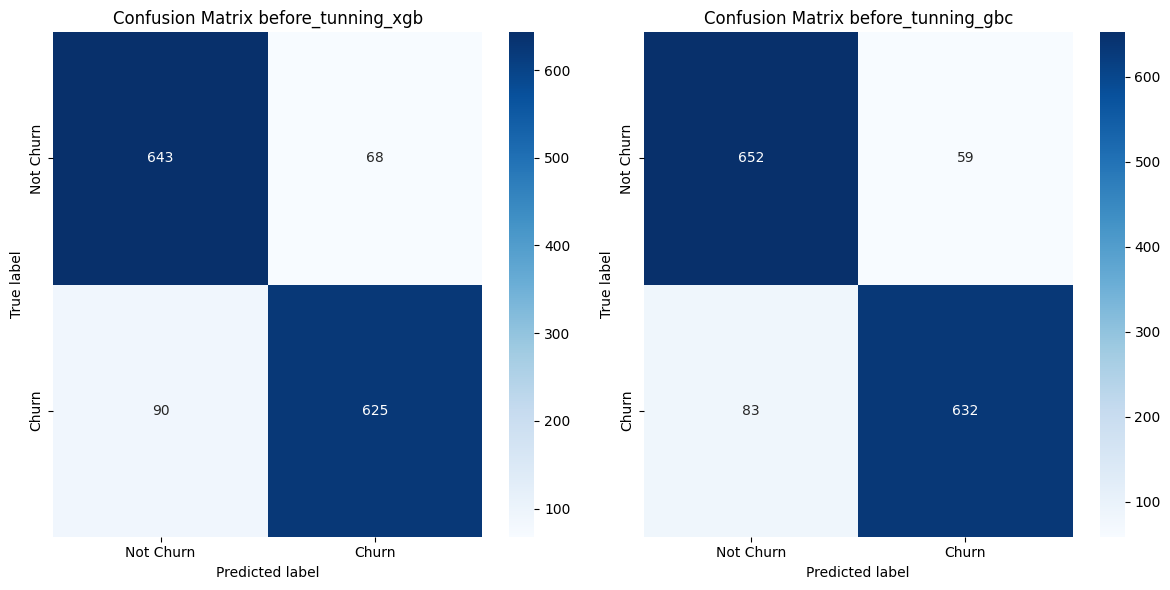

In [102]:
# Membuat confusion matrix
cm_before_tunning_xgb=confusion_matrix(y_test, y_pred_before_tuned_xgb)
cm_before_tunning_gbc=confusion_matrix(y_test, y_pred_before_tuned_gbc)

plt.figure(figsize=(12,6))

# Visualisasi confusion matrix before_tuned_xgb
plt.subplot(1,2,1)
sns.heatmap(cm_before_tunning_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix before_tunning_xgb')

# Visualisasi confusion matrix before_tuned_gbc
plt.subplot(1,2,2)
sns.heatmap(cm_before_tunning_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix before_tunning_gbc')

plt.tight_layout()
plt.show()


> **Insight :**

**1. Confusion Matrix Before Tuning (XGBoost)**

- True Positive (TP) : 625 pelanggan churn dengan benar dari total pelanggan yang churn
- True Negative (TN) : 643 pelanggan non-churn berhasil diklasifikasikan dengan benar
- False Positive (FP): 68 pelanggan non-churn yang salah diklasifikasikan sebagai churn
- False Negative (FN): 90 pelanggan churn yang salah diklasifikasikan sebagai non-churn

**2. Confusion Matrix Before Tuning (Gradient Boosting Classifier)**

- True Positive (TP): 632 pelanggan churn dengan benar dari total pelanggan yang churn
- True Negative (TN): 652 pelanggan non-churn berhasil diklasifikasikan dengan benar
- False Positive (FP): 59 pelanggan non-churn yang salah diklasifikasikan sebagai churn
- False Negative (FN): 83 pelanggan churn yang salah diklasifikasikan sebagai non-churn

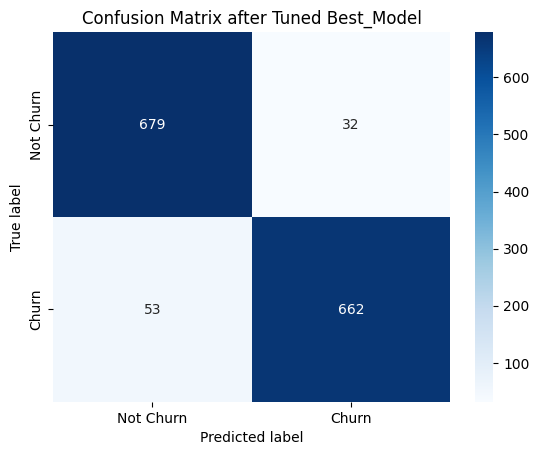

In [103]:
cm_tuned = confusion_matrix(y_test, y_pred_after)

# Visualisasi confusion matrix Best_model
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix after Tuned Best_Model')
plt.show()

> **Insight :**

**Confusion Matrix After Tuned Best_Model**

- True Positive (TP) : 662 pelanggan churn dengan benar dari total pelanggan yang churn
- True Negative (TN) : 679 pelanggan non-churn berhasil diklasifikasikan dengan benar
- False Positive (FP): 32 pelanggan non-churn yang salah diklasifikasikan sebagai churn
- False Negative (FN): 53 pelanggan churn yang salah diklasifikasikan sebagai non-churn

> **Kesimpulan :**
- Setelah tuning, model terlihat lebih baik dalam memprediksi Churn dan Not Churn, dengan True Positives (662) dan True Negatives (679) yang cukup tinggi.
- False Positives (32) dan False Negatives (53) juga sudah berkurang dibandingkan dengan model yang belum di-tuning, yang menunjukkan bahwa tuning telah meningkatkan kinerja model.

> Penurunan jumlah False Negatives menunjukkan bahwa model lebih baik dalam mendeteksi pelanggan yang benar-benar churn, yang sangat penting dalam bisnis, karena memungkinkan perusahaan untuk mengambil tindakan pencegahan lebih dini.
False Positives yang lebih rendah juga berarti model lebih jarang salah dalam memperkirakan pelanggan akan churn, menghindari tindakan yang tidak perlu terhadap pelanggan yang sebenarnya masih loyal.

### **2.6 Feature Importance**

In [104]:
# Ambil fitur penting dari model Gradient Boosting Classifier
importances = best_model.named_steps['model'].feature_importances_
features = x_train.columns  # Nama fitur dari dataset

# Buat DataFrame untuk kemudahan visualisasi
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


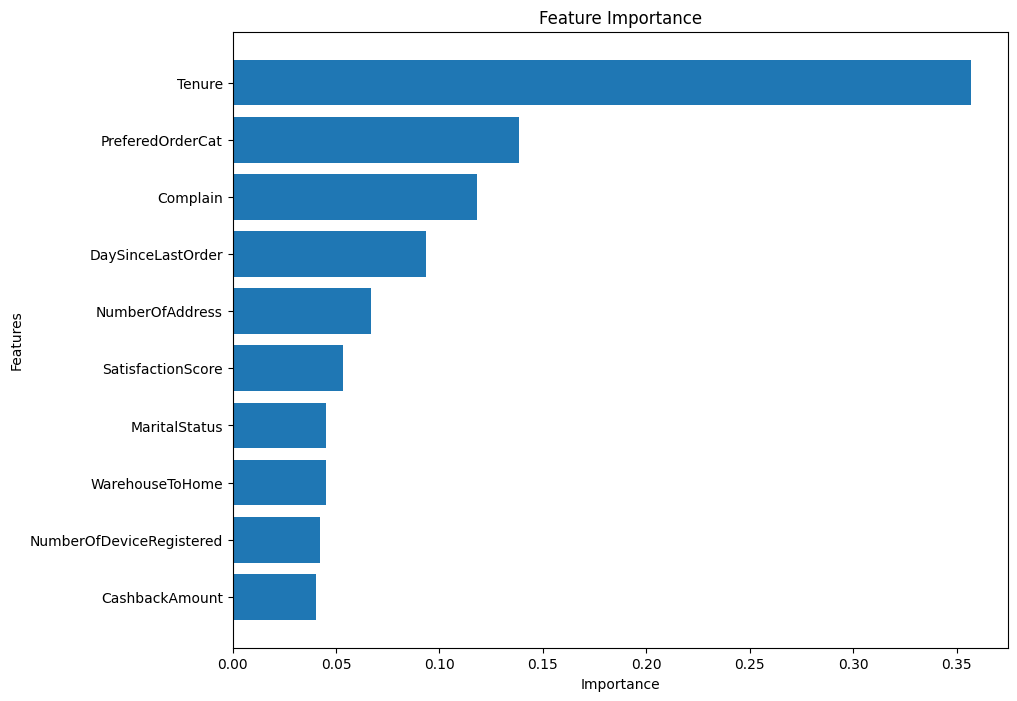

In [105]:

# Visualisasi dengan matplotlib
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Membalik urutan fitur dari yang terpenting
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


> Dari visualisasi Feature Importance di atas, kita dapat mengidentifikasi beberapa fitur yang memiliki pengaruh paling besar dalam memprediksi churn pelanggan. Berikut interpretasi dari setiap fitur yang menonjol dan relevansinya terhadap business knowledge:

**1. Tenure :**
- Interpretasi: Fitur ini merupakan faktor terpenting dalam model prediksi churn. "Tenure" mengacu pada lamanya pelanggan telah menggunakan layanan. Biasanya, semakin lama pelanggan tetap bersama layanan, semakin kecil kemungkinan mereka untuk berhenti (churn), karena mereka cenderung memiliki pengalaman positif atau merasa lebih terikat dengan layanan.
- Business Knowledge: Ini menunjukkan bahwa perusahaan harus fokus pada program loyalitas atau insentif untuk pelanggan jangka panjang agar tetap setia. Memahami pola perilaku pelanggan dengan masa layanan yang panjang juga dapat memberikan wawasan tentang bagaimana meningkatkan retensi pelanggan baru.

**2. PreferedOrderCat :**
- Interpretasi: Preferensi pelanggan dalam jenis produk atau kategori yang mereka pesan juga berpengaruh dalam prediksi churn. Pelanggan dengan preferensi yang spesifik memungkinkan memiliki loyalitas yang lebih kuat terhadap produk tertentu.
- Business Knowledge: Mengetahui preferensi kategori pesanan dapat membantu perusahaan menyusun strategi pemasaran yang lebih tepat sasaran. Dengan mempersonalisasi pengalaman berdasarkan preferensi, perusahaan dapat meningkatkan pengalaman pelanggan dan mengurangi churn.

**3. Complain :**
- Interpretasi: Keluhan adalah indikator kuat lainnya. Pelanggan yang sering mengajukan keluhan lebih memungkinkan untuk churn, terutama jika masalah mereka tidak diatasi dengan baik.
- Business Knowledge: Mengelola keluhan pelanggan secara efektif dapat secara signifikan mengurangi churn. Perusahaan perlu meninjau kembali sistem penanganan keluhan, meningkatkan layanan pelanggan, dan menangani masalah dengan cepat untuk menghindari kehilangan pelanggan.

**4. DaySinceLastOrder :**
- Interpretasi: Fitur ini menunjukkan waktu yang telah berlalu sejak pesanan terakhir pelanggan. Jika seorang pelanggan belum melakukan pemesanan dalam waktu lama, kemungkinan mereka akan churn lebih tinggi.
- Business Knowledge: Perusahaan dapat menggunakan data ini untuk menyusun kampanye pemasaran ulang (retargeting) dan menawarkan promosi khusus kepada pelanggan yang telah lama tidak aktif.

**5. NumberOfAddress :**
- Interpretasi: Jumlah alamat yang terdaftar dapat berhubungan dengan tingkat kepercayaan dan fleksibilitas yang diinginkan oleh pelanggan. Misalnya, pelanggan dengan lebih banyak alamat memungkinkan lebih sering melakukan pembelian.
- Business Knowledge: Perusahaan bisa menilai bagaimana memberikan fleksibilitas dalam pengiriman atau pelayanan pelanggan dengan alamat lebih dari satu. Program yang mengakomodasi pelanggan dengan mobilitas tinggi dapat membantu mengurangi churn.

**6. SatisfactionScore :**
- Interpretasi: Skor kepuasan pelanggan sangat penting dalam menentukan apakah pelanggan akan churn atau tidak. Pelanggan dengan skor kepuasan rendah lebih memungkinkan untuk churn.
- Business Knowledge: Perusahaan perlu fokus pada survei kepuasan pelanggan secara teratur dan meningkatkan pengalaman pelanggan berdasarkan umpan balik untuk mengurangi churn.

**7. WarehouseToHome :**
- Interpretasi: Jarak antara gudang dan rumah pelanggan juga tampaknya berpengaruh terhadap churn. Pengiriman yang cepat atau efisien memainkan peran penting dalam keputusan pelanggan untuk tetap menggunakan layanan.
- Business Knowledge: Perusahaan perlu mempertimbangkan bagaimana optimisasi rantai pasokan dan logistik dapat meningkatkan pengalaman pengiriman dan, pada akhirnya, mengurangi churn.

Secara keseluruhan, fitur-fitur ini memberikan wawasan penting bagi bisnis untuk merancang strategi retensi pelanggan yang lebih efektif. Perusahaan dapat memfokuskan upaya mereka pada kelompok pelanggan yang lebih berisiko churn, misalnya, dengan memberikan perhatian ekstra pada pelanggan dengan keluhan yang belum terselesaikan, atau pada mereka yang belum melakukan pesanan dalam jangka waktu yang lama.

---
---
## **3. Kesimpulan dan Rekomendasi**

### **3.1 Kesimpulan**
> Berdasarkan analisis yang telah dilakukan melalui berbagai langkah eksplorasi, preprocessing, modeling, dan evaluasi model, berikut adalah beberapa poin kesimpulan penting:

**Distribusi Pelanggan yang Churn**
- Dari Distribusi Pelanggan yang Churn, ditemukan bahwa proporsi pelanggan yang churn adalah 14.71%, menunjukkan bahwa mayoritas pelanggan masih tetap menggunakan layanan. Namun, persentase churn ini tetap signifikan dan perlu diperhatikan, terutama dalam rangka mempertahankan basis pelanggan.

**Handling Missing Values dan Outliers**
- Missing values yang ditemukan pada beberapa kolom seperti Tenure, WarehouseToHome, dan DaySinceLastOrder ditangani dengan menghapus data yang hilang, mengingat persentase yang kecil.
- Meskipun terdapat outliers pada beberapa fitur, seperti Tenure dan CashbackAmount, outliers dipertahankan karena mereka mencerminkan realitas dalam data yang berhubungan dengan perilaku pelanggan.

**Feature Importance**
- Tenure adalah fitur yang paling penting dalam memprediksi churn. Pelanggan dengan masa langganan yang lebih lama cenderung tidak churn.
- Fitur lainnya seperti Preferred Order Category, Complain, dan Day Since Last Order juga berperan penting dalam memprediksi churn.
- Kepuasan pelanggan dan jumlah keluhan memiliki dampak signifikan terhadap keputusan pelanggan untuk churn.


> **Evaluasi Model**

In [106]:
print('Classification Report Best_Model: \n')
print(classification_report(y_test, y_pred_after))

Classification Report Best_Model: 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       711
           1       0.95      0.93      0.94       715

    accuracy                           0.94      1426
   macro avg       0.94      0.94      0.94      1426
weighted avg       0.94      0.94      0.94      1426



 **Prediksi Churn untuk Perusahaan E-commerce Menggunakan Machine Learning**

 **1. Tujuan Project**
Tujuan dari project ini adalah untuk memprediksi apakah seorang pelanggan akan melakukan churn (berhenti menggunakan layanan) atau tetap setia menggunakan layanan e-commerce. Menggunakan **machine learning**, kita dapat mengidentifikasi pelanggan yang memiliki risiko churn, sehingga perusahaan dapat memberikan penawaran atau promosi yang lebih tepat sasaran untuk mencegah churn dan mengurangi kerugian.

---

 **2. Evaluasi Hasil Model XGBoost**
Model terbaik yang digunakan untuk prediksi churn adalah **XGBoost**. Berikut adalah hasil performa dari model berdasarkan **classification report**:

- **Precision:**
    - Pelanggan yang tidak churn: 93%
    - Pelanggan yang churn: 95%

- **Recall:**
    - Pelanggan yang tidak churn: 95%
    - Pelanggan yang churn: 93%

- **F1-Score:**
    - Pelanggan yang tidak churn: 94%
    - Pelanggan yang churn: 94%

Model ini berhasil mencapai tingkat akurasi keseluruhan sebesar **94%**, menunjukkan bahwa model cukup handal dalam memprediksi pelanggan yang akan churn dan tidak churn.

---

 **3. Biaya Tanpa Menggunakan Machine Learning**
Tanpa menggunakan **machine learning**, perusahaan harus melakukan promosi kepada semua pelanggan secara merata untuk mengurangi risiko churn. Ini menyebabkan pemborosan besar, karena perusahaan memberikan promosi kepada pelanggan yang sebenarnya tidak akan churn. Berikut adalah perhitungan biaya promosi dan kerugian jika perusahaan tidak menggunakan machine learning:

| Target | Biaya |
| --- | --- |
| asumsi semua pelanggan menerima biaya promosi | 50 USD / pelanggan |
|asumsi pelanggan yang akan churn menerima biaya promosi  | 5x dari biaya pelanggan yg tdk churn `atau` 250 USD|

 **Biaya Promosi:**
- Semua pelanggan menerima promosi: `50 USD x 1426 pelanggan = 71.300 USD`
- Biaya yang tepat sasaran (pelanggan churn yang benar-benar perlu promosi): `250 USD x 715 pelanggan = 178.750 USD`

 **Total Biaya yang Tidak Tepat Sasaran:**
- **71.300 USD** - **178.750 USD** = **- 107.450 USD** kerugian untuk **1426 pelanggan**.

Tanpa menggunakan machine learning, perusahaan akan menghadapi kerugian sebesar **- 107.450 USD** per sekali Campaign.

---

 **4. Menggunakan Machine Learning (ML)**
Dengan menggunakan model **XGBoost** yang telah di-tuning, perusahaan dapat menghemat pengeluaran promosi dengan fokus hanya pada pelanggan yang diprediksi akan churn. Berikut adalah estimasi pengeluaran dan penghematan dengan menggunakan model ML:

 **Biaya Promosi Tepat Sasaran (FP + TP):**
- (654 pelanggan FP + 1426 pelanggan TP) x 50 USD = **104.000 USD**

 **Biaya Kehilangan Pelanggan (FN):**
- 53 pelanggan FN x 250 USD = **13.250 USD**

 **Biaya Tepat Sasaran (TP):**
- 662 pelanggan TP x 250 USD = **165.500 USD**

 **Total Pengeluaran dengan ML:**
- **104.000  USD** (biaya FP + TP) + **13.250 USD** (biaya kehilangan FN) = **177.250 USD**

 **Biaya Promosi:**
- **165.500 USD** dari promosi tepat sasaran.

 **Total Biaya yang Tidak Tepat Sasaran:**
- **177.250 USD** - **165.500 USD** = ** -11.750 USD** keuntungan bersih untuk **1426 pelanggan**.

Dengan menggunakan ML, perusahaan akan menghadapi kerugian sebesar **- 11.750 USD**.

---

 **5. Perbandingan Tanpa dan Dengan Machine Learning**
- **Tanpa Machine Learning:** Perusahaan akan mengalami kerugian hingga **- 107.450 USD** per sekali Campaign.
- **Dengan Machine Learning:** perusahaan akan menghadapi kerugian sebesar **- 11.750 USD** per sekali Campaign.

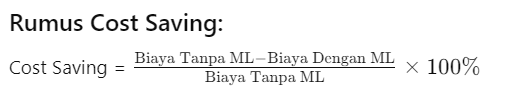


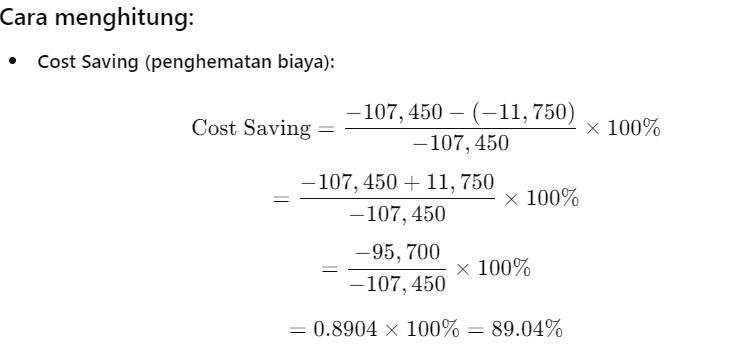

Dengan demikian, menggunakan **Machine Learning** memberikan dampak finansial yang signifikan terhadap bisnis, menghemat biaya promosi sebesar 89.04% yang tidak tepat sasaran, dan meningkatkan pendapatan dengan mempertahankan pelanggan yang lebih berisiko churn.

---

 **6. Kesimpulan dan Rekomendasi**
- **Model XGBoost** setelah tuning menghasilkan performa yang baik dengan **akurasi 94%** dan F1-score yang konsisten untuk kelas churn dan tidak churn.
- Menggunakan **machine learning** membantu perusahaan mengalokasikan sumber daya promosi secara lebih efisien, fokus pada pelanggan yang berisiko churn, sehingga perusahaan dapat menghemat biaya promosi yang tidak perlu dan meningkatkan retensi pelanggan.
- **Rekomendasi:** Perusahaan harus terus mengembangkan model prediksi churn ini dengan melakukan evaluasi secara berkala. Selain itu, strategi promosi yang tepat sasaran untuk pelanggan berisiko churn perlu diperkuat, seperti melalui program loyalitas, penawaran khusus, atau peningkatan layanan pelanggan.

---


 **Literatur dan Referensi**
1. **Cost of Customer Churn**: SuperOffice Blog. Available at: [SuperOffice Customer Churn](https://www.superoffice.com/blog/reduce-customer-churn/)
2. **Operating Loss**: Investopedia. Available at: [Operating Loss Definition](https://www.investopedia.com/terms/o/operating-loss.asp)
3. **Impact of False Positive and False Negative**: Science Direct. Available at: [Cost of Promotion](https://www.sciencedirect.com/science/article/abs/pii/S0969698916303411)

---

Dengan penerapan **machine learning** dalam prediksi churn, perusahaan e-commerce ini dapat meraih **profit** yang lebih tinggi dan meminimalkan **loss** dalam strategi promosi mereka.

### **3.2 Rekomendasi**

#### **3.2.1 Rekomendasi untuk Kedepannya**

**1. Fokus pada Retensi Pelanggan dengan Tenure Rendah :**
- Mengingat Tenure menjadi indikator paling signifikan dalam memprediksi churn, perusahaan sebaiknya fokus pada retensi pelanggan baru atau yang memiliki masa langganan singkat. Strategi seperti memberikan diskon berkelanjutan, program loyalitas, atau insentif lainnya bisa menjadi langkah untuk memperpanjang masa berlangganan mereka.

**2. Perbaiki Pengelolaan Keluhan Pelanggan**
- Pelanggan yang mengajukan keluhan lebih memungkinkan untuk churn. Menyediakan layanan pelanggan yang cepat dan efektif, serta memberikan solusi yang memadai terhadap keluhan, dapat mengurangi tingkat churn secara signifikan.

**3. Tingkatkan Pengalaman Berbelanja untuk Kategori Produk Utama**
- Fitur Preferred Order Category juga menunjukkan bahwa pelanggan yang lebih sering membeli kategori produk tertentu (misalnya, Laptop & Accessories, dan Mobile Phone) lebih cenderung untuk tetap berlangganan. Dengan mengoptimalkan penawaran dan pengalaman belanja untuk kategori ini, perusahaan bisa meningkatkan loyalitas pelanggan.

**4. Pantau Pelanggan yang Tidak Aktif**
- Pelanggan yang tidak melakukan pesanan dalam waktu yang lama lebih memungkinkan untuk churn. Strategi retargeting dengan email marketing atau penawaran spesial kepada pelanggan yang telah lama tidak melakukan transaksi bisa membantu mencegah churn.

**5. Perbaiki Pengalaman Pengiriman**
- Mengoptimalkan pengiriman, terutama pada pelanggan dengan jarak pengiriman yang jauh (Warehouse to Home), bisa membantu mengurangi churn. Efisiensi dalam pengiriman atau memberi opsi pengiriman yang lebih cepat dapat meningkatkan kepuasan pelanggan.

## **Penutup**

Menggunakan pendekatan machine learning dalam prediksi churn memungkinkan e-commerce ini untuk memahami lebih dalam tentang pelanggan mereka, mempersonalisasi pengalaman pelanggan, dan pada akhirnya meningkatkan loyalitas serta mengurangi churn.

# **Terima Kasih**

## **Model Deployment**

### **Save Model**

In [107]:
# # fit
# final_model = estimator.fit(X,Y)

# # save with pickle
# pickle.dump(final_model, open('Ecommerce_churn_Best_Model_XGBC.sav', 'wb'))

### **Load Model**

In [108]:
# loaded_model = pickle.load(open('Ecommerce_churn_Best_Model_XGBC.sav', 'rb'))

In [109]:
# # Load the saved model
# loaded_model = pickle.load(open('Ecommerce_churn_Best_Model_XGBC.sav', 'rb'))

# # Mapping for the categorical features
# PreferedOrderCat_mapping = {'Fashion': 0, 'Grocery': 1, 'Laptop & Accessory': 2, 'Mobile Phone': 3, 'Others': 4}
# MaritalStatus_mapping = {'Divorced': 0, 'Single': 1, 'Married': 2}

# # Create a new test data as DataFrame
# df_test = pd.DataFrame({
#     'Tenure': [11.0],
#     'WarehouseToHome': [6.0],
#     'NumberOfDeviceRegistered': [4],
#     'PreferedOrderCat': [PreferedOrderCat_mapping['Mobile Phone']],  # Replace 'Fashion' with other categories if needed
#     'SatisfactionScore': [4],
#     'MaritalStatus': [MaritalStatus_mapping['Single']],  # Replace 'Married' with other categories if needed
#     'NumberOfAddress': [11.0],
#     'Complain': [1],
#     'DaySinceLastOrder': [10.0],
#     'CashbackAmount': [150.0]
# })

# # Print sample data
# display(df_test)

# # Predict class and probability
# predicted_class = loaded_model.predict(df_test)
# predicted_proba = loaded_model.predict_proba(df_test)

# print("Predicted class:", predicted_class)
# print("Predicted probability:", predicted_proba)